#**CIS 5450: Final Project**

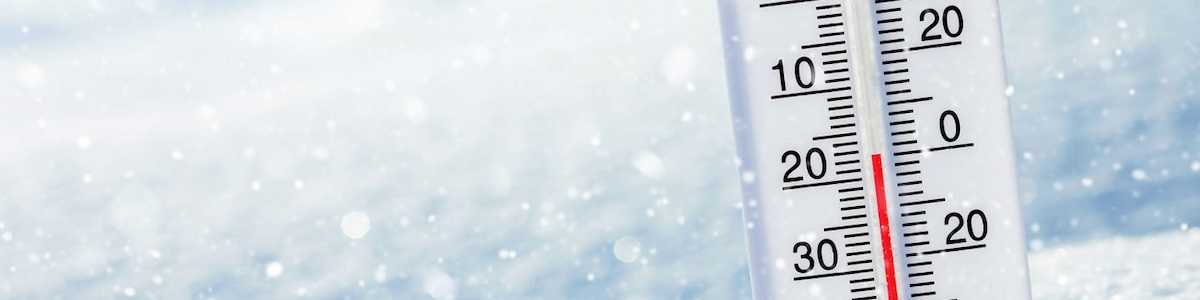
###**Group Members**
- Andrew Wang (Email: andreww8@seas.upenn.edu)
- Randy Chou (Email: ranchou@seas.upenn.edu)
- Rohan Saraogi (Email: rsaraogi@seas.upenn.edu)

#**Introduction**

Accurate temperature forcasting and tracking of climate change and global warming is vital since extreme temperature trends can, among other things, adversely affect agriculture and public health. Predicting future trends, understanding differences between regions, and investigating the factors that affect temperature can help countries better prepare for the consequences of climate change and global warming.

In this project we aim to investigate and visualize the patterns of temperature change for different regions across the world. To better understand the factors that affect temperature, we also aim to investigate the impact on temperature of potentially related development indicators. Finally, we build temperature forecasting models based on traditional (SARIMA) and deep learning (RNN, LSTM, GRU) methods, and compare the performances of our models on test data. For the modeling we focus specifically on United States (US) country-level and state-level temperature data.

To achieve our objectives, we have used the [Climate Change: Earth Surface Temperature Data](https://www.kaggle.com/datasets/berkeleyearth/climate-change-earth-surface-temperature-data?select=GlobalLandTemperaturesByCountry.csv) dataset from Kaggle. The dataset contains earth surface temperature data and is a repackaging of a compilation put together by Berkeley Earth, which is affiliated with Lawrence Berkeley National Laboratory. The dataset allows for slicing into interesting subsets, including at the global-level, country-level, state-level and city-level. To understand the factors that affect temperature, we join the dataset with the [World Development Indicators](https://www.kaggle.com/datasets/kaggle/world-development-indicators?select=Indicators.csv) dataset from Kaggle. The dataset is from the World Bank and contains over a thousand annual indicators of economic development from hundreds of countries around the world.

#**Data Loading**

In this section we load the data.

In [ ]:
# Import packages
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None # default='warn'

In [ ]:
# Load data into memory from drive
!gdown 1Bi0cEO3i-sdyyG4fh98xOJsbz897oQwZ
!gdown 1h0VmgCFH1xVVjYpUHgCvjLHFO8RthuHh
!gdown 1Vy-DSgEeDiMvuDIfEfDH0bT9Y8K8-jAL
!gdown 1KqaXWXM909h_d8a0-0GobuKjyjpG9mR5
!gdown 1plddHeqB23EKuToqoxoACcJlYbuYaVeL
!gdown 1yUfIxEy6p86rjmo-vnIWQ8-gUhq4tGto
!gdown 1fQpNNyRa67Hq9HuvCfbey4hUE13Zxj8j

Downloading...
From: https://drive.google.com/uc?id=1Bi0cEO3i-sdyyG4fh98xOJsbz897oQwZ
To: /content/GlobalLandTemperaturesByCountry.csv
100% 22.7M/22.7M [00:00<00:00, 51.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1h0VmgCFH1xVVjYpUHgCvjLHFO8RthuHh
To: /content/GlobalLandTemperaturesByState.csv
100% 30.8M/30.8M [00:00<00:00, 66.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Vy-DSgEeDiMvuDIfEfDH0bT9Y8K8-jAL
To: /content/Indicators.csv
100% 574M/574M [00:06<00:00, 86.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1KqaXWXM909h_d8a0-0GobuKjyjpG9mR5
To: /content/states.csv
100% 873/873 [00:00<00:00, 1.79MB/s]
Downloading...
From: https://drive.google.com/uc?id=1plddHeqB23EKuToqoxoACcJlYbuYaVeL
To: /content/GlobalLandTemperaturesByMajorCity.csv
100% 14.1M/14.1M [00:00<00:00, 82.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1yUfIxEy6p86rjmo-vnIWQ8-gUhq4tGto
To: /content/GlobalLandTemperaturesByCity.csv
100% 533M/533M [00:06<00:00, 79.0MB/s]
D

In [ ]:
# Load data from memory into dataframes
tempGlobal_df = pd.read_csv('/content/GlobalTemperatures.csv')
tempByCity_df = pd.read_csv('/content/GlobalLandTemperaturesByCity.csv')
tempByMajorCity_df = pd.read_csv('/content/GlobalLandTemperaturesByMajorCity.csv')
tempByState_df = pd.read_csv('/content/GlobalLandTemperaturesByState.csv')
tempByCountry_df = pd.read_csv('/content/GlobalLandTemperaturesByCountry.csv')
bridge_df = pd.read_csv('/content/states.csv')
df_indicators = pd.read_csv("/content/Indicators.csv")

#**Preliminary Exploratory Data Analysis (EDA)**

In this section we gather some summary statistics about the data. This will give us a better sense of what we are working with, and guide data preprocessing in subsequent sections. We note that our data sources contain several sub datasets. Although we do not use each and every one of these datasets in subsequent sections, we include brief statistics about them here for the purposes of completion. The flow of each subsection follows a very similar structure.

###**Global Temperatures**

Here we explore the global temperatures data. We begin by printing the dataset column names and data types.

In [ ]:
print(tempGlobal_df.columns) 
print(tempGlobal_df.dtypes) 

Index(['dt', 'LandAverageTemperature', 'LandAverageTemperatureUncertainty',
       'LandMaxTemperature', 'LandMaxTemperatureUncertainty',
       'LandMinTemperature', 'LandMinTemperatureUncertainty',
       'LandAndOceanAverageTemperature',
       'LandAndOceanAverageTemperatureUncertainty'],
      dtype='object')
dt                                            object
LandAverageTemperature                       float64
LandAverageTemperatureUncertainty            float64
LandMaxTemperature                           float64
LandMaxTemperatureUncertainty                float64
LandMinTemperature                           float64
LandMinTemperatureUncertainty                float64
LandAndOceanAverageTemperature               float64
LandAndOceanAverageTemperatureUncertainty    float64
dtype: object


The variable descriptions, as determined from Kaggle, are:
*   `dt`: Date
*   `LandAverageTemperature`: Global average land temperature (in °C)
*   `LandAverageTemperatureUncertainty`: 95% confidence interval around the average
*   `LandMaxTemperature`: Global average maximum land temperature (in °C)
*   `LandMaxTemperatureUncertainty`: 95% confidence interval around the maximum land temperature
*   `LandMinTemperature`: Global average minimum land temperature (in °C)
*   `LandMinTemperatureUncertainty`: 95% confidence interval around the minimum land temperature
*   `LandAndOceanAverageTemperature`: Global average land and ocean temperature (in °C)
*   `LandAndOceanAverageTemperatureUncertainty`: 95% confidence interval around the global average land and ocean temperature

We note that we will use pandas' `to_datetime` function to convert `dt` from object to a more easily usable datetime format. We also note that all temperature columns are already in floating point format and hence do not require any type conversions (we will not be working with the uncertainty columns from any of the datasets).

We now print summary statistics for the columns. Other than showing it, we do not delve into these statistics in detail here. That will be the subject of our SQL, visualization, and modelling sections.

In [ ]:
tempGlobal_df.describe()

LandAverageTemperature  LandAverageTemperatureUncertainty  \
count             3180.000000                        3180.000000   
mean                 8.374731                           0.938468   
std                  4.381310                           1.096440   
min                 -2.080000                           0.034000   
25%                  4.312000                           0.186750   
50%                  8.610500                           0.392000   
75%                 12.548250                           1.419250   
max                 19.021000                           7.880000   

       LandMaxTemperature  LandMaxTemperatureUncertainty  LandMinTemperature  \
count         1992.000000                    1992.000000         1992.000000   
mean            14.350601                       0.479782            2.743595   
std              4.309579                       0.583203            4.155835   
min              5.900000                       0.044000           -5.407000   
25%             10.212000                       0.142000           -1.334500   
50%             14.760000                       0.252000            2.949500   
75%             18.451500                       0.539000            6.778750   
max             21.320000                       4.373000            9.715000   

       LandMinTemperatureUncertainty  LandAndOceanAverageTemperature  \
count                    1992.000000                     1992.000000   
mean                        0.431849                       15.212566   
std                         0.445838                        1.274093   
min                         0.045000                       12.475000   
25%                         0.155000                       14.047000   
50%                         0.279000                       15.251000   
75%                         0.458250                       16.396250   
max                         3.498000                       17.611000   

       LandAndOceanAverageTemperatureUncertainty  
count                                1992.000000  
mean                                    0.128532  
std                                     0.073587  
min                                     0.042000  
25%                                     0.063000  
50%                                     0.122000  
75%                                     0.151000  
max                                     0.457000

We now print the dataset and can see that there are 3192 rows, with some rows containing NaN values.

In [ ]:
tempGlobal_df

dt  LandAverageTemperature  LandAverageTemperatureUncertainty  \
0     1750-01-01                   3.034                              3.574   
1     1750-02-01                   3.083                              3.702   
2     1750-03-01                   5.626                              3.076   
3     1750-04-01                   8.490                              2.451   
4     1750-05-01                  11.573                              2.072   
...          ...                     ...                                ...   
3187  2015-08-01                  14.755                              0.072   
3188  2015-09-01                  12.999                              0.079   
3189  2015-10-01                  10.801                              0.102   
3190  2015-11-01                   7.433                              0.119   
3191  2015-12-01                   5.518                              0.100   

      LandMaxTemperature  LandMaxTemperatureUncertainty  LandMinTemperature  \
0                    NaN                            NaN                 NaN   
1                    NaN                            NaN                 NaN   
2                    NaN                            NaN                 NaN   
3                    NaN                            NaN                 NaN   
4                    NaN                            NaN                 NaN   
...                  ...                            ...                 ...   
3187              20.699                          0.110               9.005   
3188              18.845                          0.088               7.199   
3189              16.450                          0.059               5.232   
3190              12.892                          0.093               2.157   
3191              10.725                          0.154               0.287   

      LandMinTemperatureUncertainty  LandAndOceanAverageTemperature  \
0                               NaN                             NaN   
1                               NaN                             NaN   
2                               NaN                             NaN   
3                               NaN                             NaN   
4                               NaN                             NaN   
...                             ...                             ...   
3187                          0.170                          17.589   
3188                          0.229                          17.049   
3189                          0.115                          16.290   
3190                          0.106                          15.252   
3191                          0.099                          14.774   

      LandAndOceanAverageTemperatureUncertainty  
0                                           NaN  
1                                           NaN  
2                                           NaN  
3                                           NaN  
4                                           NaN  
...                                         ...  
3187                                      0.057  
3188                                      0.058  
3189                                      0.062  
3190                                      0.063  
3191                                      0.062  

[3192 rows x 9 columns]

To delve deeper, below we print the no. of NaN values/unique values for some relevant columns.

In [ ]:
DateTime_numNaN = tempGlobal_df['dt'].isna().sum()
LandAverageTemperature_numNaN = tempGlobal_df['LandAverageTemperature'].isna().sum()
LandAverageTemperatureUncertainty_numNaN = tempGlobal_df['LandAverageTemperatureUncertainty'].isna().sum()
LandMaxTemperature_numNaN = tempGlobal_df['LandMaxTemperature'].isna().sum()
LandMaxTemperatureUncertainty_numNaN = tempGlobal_df['LandMaxTemperatureUncertainty'].isna().sum()
LandMinTemperature_numNaN = tempGlobal_df['LandMinTemperature'].isna().sum()
LandMinTemperatureUncertainty_numNaN = tempGlobal_df['LandMinTemperatureUncertainty'].isna().sum()
LandAndOceanAverageTemperature_numNaN = tempGlobal_df['LandAndOceanAverageTemperature'].isna().sum()
LandAndOceanAverageTemperatureUncertainty_numNaN = tempGlobal_df['LandAndOceanAverageTemperatureUncertainty'].isna().sum()

numUniqueDates = len(tempGlobal_df['dt'].unique())

print("DateTime # NaN values: ", DateTime_numNaN)
print("LandAverageTemperature # NaN values: ", LandAverageTemperature_numNaN)
print("LandAverageTemperatureUncertainty # NaN values: ", LandAverageTemperatureUncertainty_numNaN)
print("LandMaxTemperature # NaN values: ", LandMaxTemperature_numNaN)
print("LandMaxTemperatureUncertainty # NaN values: ", LandMaxTemperatureUncertainty_numNaN)
print("LandMinTemperature # NaN values: ", LandMinTemperature_numNaN)
print("LandMinTemperatureUncertainty # NaN values: ", LandMinTemperatureUncertainty_numNaN)
print("LandAndOceanAverageTemperature # NaN values: ", LandAndOceanAverageTemperature_numNaN)
print("LandAndOceanAverageTemperatureUncertainty # NaN values: ", LandAndOceanAverageTemperatureUncertainty_numNaN)

print("Number of unique dates: ", numUniqueDates)


DateTime # NaN values:  0
LandAverageTemperature # NaN values:  12
LandAverageTemperatureUncertainty # NaN values:  12
LandMaxTemperature # NaN values:  1200
LandMaxTemperatureUncertainty # NaN values:  1200
LandMinTemperature # NaN values:  1200
LandMinTemperatureUncertainty # NaN values:  1200
LandAndOceanAverageTemperature # NaN values:  1200
LandAndOceanAverageTemperatureUncertainty # NaN values:  1200
Number of unique dates:  3192


We can see that there are some NaN values, particularly in the case of temperature. We will address this further when working on the models.



###**Global Temperatures By Country**

Here we explore the global temperatures by country data. We begin by printing the dataset column names and data types.

In [ ]:
print(tempByCountry_df.columns)
print(tempByCountry_df.dtypes)

Index(['dt', 'AverageTemperature', 'AverageTemperatureUncertainty', 'Country'], dtype='object')
dt                                object
AverageTemperature               float64
AverageTemperatureUncertainty    float64
Country                           object
dtype: object


As determined from Kaggle, the temperature and uncertainty columns here are for land temperatures. As before, the temperature column is of the required floating point format and we also have an additional `Country` column to slice temperatures by country.

We now print summary statistics for the columns. Other than showing it, we do not delve into these statistics in detail here. That will be the subject of our SQL, visualization, and modelling sections.

In [ ]:
tempByCountry_df.describe()

AverageTemperature  AverageTemperatureUncertainty
count       544811.000000                  545550.000000
mean            17.193354                       1.019057
std             10.953966                       1.201930
min            -37.658000                       0.052000
25%             10.025000                       0.323000
50%             20.901000                       0.571000
75%             25.814000                       1.206000
max             38.842000                      15.003000

We now print the dataset and can see that there are 577462 rows, with some rows containing NaN values.

In [ ]:
tempByCountry_df

dt  AverageTemperature  AverageTemperatureUncertainty  \
0       1743-11-01               4.384                          2.294   
1       1743-12-01                 NaN                            NaN   
2       1744-01-01                 NaN                            NaN   
3       1744-02-01                 NaN                            NaN   
4       1744-03-01                 NaN                            NaN   
...            ...                 ...                            ...   
577457  2013-05-01              19.059                          1.022   
577458  2013-06-01              17.613                          0.473   
577459  2013-07-01              17.000                          0.453   
577460  2013-08-01              19.759                          0.717   
577461  2013-09-01                 NaN                            NaN   

         Country  
0          Åland  
1          Åland  
2          Åland  
3          Åland  
4          Åland  
...          ...  
577457  Zimbabwe  
577458  Zimbabwe  
577459  Zimbabwe  
577460  Zimbabwe  
577461  Zimbabwe  

[577462 rows x 4 columns]

To delve deeper, below we print the no. of NaN values/unique values for some relevant columns.

In [ ]:
DateTime_numNaN = tempByCountry_df['dt'].isna().sum()
AverageTemperature_numNaN = tempByCountry_df['AverageTemperature'].isna().sum()
AverageTemperatureUncertainty_numNaN = tempByCountry_df['AverageTemperatureUncertainty'].isna().sum()
Country_numNaN = tempByCountry_df['Country'].isna().sum()

numUniqueDates = len(tempByCountry_df['dt'].unique())
numUniqueCountries = len(tempByCountry_df['Country'].unique())

print("DateTime # NaN values: ", DateTime_numNaN)
print("AverageTemperature # NaN values: ", AverageTemperature_numNaN)
print("AverageTemperatureUncertainty # NaN values: ", AverageTemperatureUncertainty_numNaN)
print("Country # NaN values: ", Country_numNaN)

print("Number of unique dates: ", numUniqueDates)
print("Number of unique countries: ", numUniqueCountries)

DateTime # NaN values:  0
AverageTemperature # NaN values:  32651
AverageTemperatureUncertainty # NaN values:  31912
Country # NaN values:  0
Number of unique dates:  3239
Number of unique countries:  243


As before, we can see that there are several NaN values, particularly in the case of temperature. We will address this further when working on the models.

###**Global Temperatures By State**

Here we explore the global temperatures by state data. We begin by printing the dataset column names and data types.

In [ ]:
print(tempByState_df.columns) 
print(tempByState_df.dtypes) 

Index(['dt', 'AverageTemperature', 'AverageTemperatureUncertainty', 'State',
       'Country'],
      dtype='object')
dt                                object
AverageTemperature               float64
AverageTemperatureUncertainty    float64
State                             object
Country                           object
dtype: object


As determined from Kaggle, the temperature and uncertainty columns here are for land temperatures. As before, the temperature column is of the required floating point format and we also have additional `Country` and `State` columns to slice temperatures by country and state.

We now print summary statistics for the columns. Other than showing it, we do not delve into these statistics in detail here. That will be the subject of our SQL, visualization, and modelling sections.

In [ ]:
tempByState_df.describe()

AverageTemperature  AverageTemperatureUncertainty
count       620027.000000                  620027.000000
mean             8.993111                       1.287647
std             13.772150                       1.360392
min            -45.389000                       0.036000
25%             -0.693000                       0.316000
50%             11.199000                       0.656000
75%             19.899000                       1.850000
max             36.339000                      12.646000

We now print the dataset and can see that there are 645675 rows, with some rows containing NaN values.

In [ ]:
tempByState_df

dt  AverageTemperature  AverageTemperatureUncertainty  \
0       1855-05-01              25.544                          1.171   
1       1855-06-01              24.228                          1.103   
2       1855-07-01              24.371                          1.044   
3       1855-08-01              25.427                          1.073   
4       1855-09-01              25.675                          1.014   
...            ...                 ...                            ...   
645670  2013-05-01              21.634                          0.578   
645671  2013-06-01              24.679                          0.596   
645672  2013-07-01              29.272                          1.340   
645673  2013-08-01              29.202                          0.869   
645674  2013-09-01                 NaN                            NaN   

           State Country  
0           Acre  Brazil  
1           Acre  Brazil  
2           Acre  Brazil  
3           Acre  Brazil  
4           Acre  Brazil  
...          ...     ...  
645670  Zhejiang   China  
645671  Zhejiang   China  
645672  Zhejiang   China  
645673  Zhejiang   China  
645674  Zhejiang   China  

[645675 rows x 5 columns]

To delve deeper, below we print the no. of NaN values/unique values for some relevant columns.

In [ ]:
DateTime_numNaN = tempByState_df['dt'].isna().sum()
AverageTemperature_numNaN = tempByState_df['AverageTemperature'].isna().sum()
AverageTemperatureUncertainty_numNaN = tempByState_df['AverageTemperatureUncertainty'].isna().sum()
State_numNaN = tempByState_df['State'].isna().sum()
Country_numNaN = tempByState_df['Country'].isna().sum()

numUniqueDates = len(tempByState_df['dt'].unique())
numUniqueStates = len(tempByState_df['State'].unique())
numUniqueCountries = len(tempByState_df['Country'].unique())

print("DateTime # NaN values: ", DateTime_numNaN)
print("AverageTemperature # NaN values: ", AverageTemperature_numNaN)
print("AverageTemperatureUncertainty # NaN values: ", AverageTemperatureUncertainty_numNaN)
print("State # NaN values: ", State_numNaN)
print("Country # NaN values: ", Country_numNaN)

print("Number of unique dates: ", numUniqueDates)
print("Number of unique cities: ", numUniqueStates)
print("Number of unique countries: ", numUniqueCountries)

DateTime # NaN values:  0
AverageTemperature # NaN values:  25648
AverageTemperatureUncertainty # NaN values:  25648
State # NaN values:  0
Country # NaN values:  0
Number of unique dates:  3239
Number of unique cities:  241
Number of unique countries:  7


As before, we can see that there are several NaN values, particularly in the case of temperature. We will address this further when working on the models.

###**Global Temperatures By City**

Here we explore the global temperatures by city data. We begin by printing the dataset column names and data types.

In [ ]:
print(tempByCity_df.columns)
print(tempByCity_df.dtypes)

Index(['dt', 'AverageTemperature', 'AverageTemperatureUncertainty', 'City',
       'Country', 'Latitude', 'Longitude'],
      dtype='object')
dt                                object
AverageTemperature               float64
AverageTemperatureUncertainty    float64
City                              object
Country                           object
Latitude                          object
Longitude                         object
dtype: object


As determined from Kaggle, the temperature and uncertainty columns here are for land temperatures. As before, the temperature column is of the required floating point format and we also have additional `Country`, `City`, `Latitude`, and `Longitude` columns to slice temperatures.

We now print summary statistics for the columns.

In [ ]:
tempByCity_df.describe()

AverageTemperature  AverageTemperatureUncertainty
count        8.235082e+06                   8.235082e+06
mean         1.672743e+01                   1.028575e+00
std          1.035344e+01                   1.129733e+00
min         -4.270400e+01                   3.400000e-02
25%          1.029900e+01                   3.370000e-01
50%          1.883100e+01                   5.910000e-01
75%          2.521000e+01                   1.349000e+00
max          3.965100e+01                   1.539600e+01

We now print the dataset and can see that there are 8599212 rows, with some rows containing NaN values.

In [ ]:
tempByCity_df

dt  AverageTemperature  AverageTemperatureUncertainty  \
0        1743-11-01               6.068                          1.737   
1        1743-12-01                 NaN                            NaN   
2        1744-01-01                 NaN                            NaN   
3        1744-02-01                 NaN                            NaN   
4        1744-03-01                 NaN                            NaN   
...             ...                 ...                            ...   
8599207  2013-05-01              11.464                          0.236   
8599208  2013-06-01              15.043                          0.261   
8599209  2013-07-01              18.775                          0.193   
8599210  2013-08-01              18.025                          0.298   
8599211  2013-09-01                 NaN                            NaN   

           City      Country Latitude Longitude  
0         Århus      Denmark   57.05N    10.33E  
1         Århus      Denmark   57.05N    10.33E  
2         Århus      Denmark   57.05N    10.33E  
3         Århus      Denmark   57.05N    10.33E  
4         Århus      Denmark   57.05N    10.33E  
...         ...          ...      ...       ...  
8599207  Zwolle  Netherlands   52.24N     5.26E  
8599208  Zwolle  Netherlands   52.24N     5.26E  
8599209  Zwolle  Netherlands   52.24N     5.26E  
8599210  Zwolle  Netherlands   52.24N     5.26E  
8599211  Zwolle  Netherlands   52.24N     5.26E  

[8599212 rows x 7 columns]

To delve deeper, below we print the no. of NaN values/unique values for some relevant columns.

In [ ]:
DateTime_numNaN = tempByCity_df['dt'].isna().sum()
AverageTemperature_numNaN = tempByCity_df['AverageTemperature'].isna().sum()
AverageTemperatureUncertainty_numNaN = tempByCity_df['AverageTemperatureUncertainty'].isna().sum()
City_numNaN = tempByCity_df['City'].isna().sum()
Country_numNaN = tempByCity_df['Country'].isna().sum()
Latitude_numNaN = tempByCity_df['Latitude'].isna().sum()
Longitude_numNaN = tempByCity_df['Longitude'].isna().sum()

numUniqueDates = len(tempByCity_df['dt'].unique())
numUniqueCities = len(tempByCity_df['City'].unique())
numUniqueCountries = len(tempByCity_df['Country'].unique())

print("DateTime # NaN values: ", DateTime_numNaN)
print("AverageTemperature # NaN values: ", AverageTemperature_numNaN)
print("AverageTemperatureUncertainty # NaN values: ", AverageTemperatureUncertainty_numNaN)
print("City # NaN values: ", City_numNaN)
print("Country # NaN values: ", Country_numNaN)
print("Latitude # NaN values: ", Latitude_numNaN)
print("Longitude # NaN values: ", Longitude_numNaN)

print("Number of unique dates: ", numUniqueDates)
print("Number of unique cities: ", numUniqueCities)
print("Number of unique countries: ", numUniqueCountries)

DateTime # NaN values:  0
AverageTemperature # NaN values:  364130
AverageTemperatureUncertainty # NaN values:  364130
City # NaN values:  0
Country # NaN values:  0
Latitude # NaN values:  0
Longitude # NaN values:  0
Number of unique dates:  3239
Number of unique cities:  3448
Number of unique countries:  159


As before, we can see that there are several NaN values, particularly in the case of temperature.

###**Global Temperatures By Major City**

Here we explore the global temperatures by major city data. We begin by printing the dataset column names and data types.

In [ ]:
print(tempByMajorCity_df.columns) 
print(tempByMajorCity_df.dtypes) 

Index(['dt', 'AverageTemperature', 'AverageTemperatureUncertainty', 'City',
       'Country', 'Latitude', 'Longitude'],
      dtype='object')
dt                                object
AverageTemperature               float64
AverageTemperatureUncertainty    float64
City                              object
Country                           object
Latitude                          object
Longitude                         object
dtype: object


As determined from Kaggle, the temperature and uncertainty columns here are for land temperatures. As before, the temperature column is of the required floating point format and we also have additional `Country`, `City`, `Latitude`, and `Longitude` columns to slice temperatures.

We now print summary statistics for the columns.

In [ ]:
tempByMajorCity_df.describe()

AverageTemperature  AverageTemperatureUncertainty
count       228175.000000                  228175.000000
mean            18.125969                       0.969343
std             10.024800                       0.979644
min            -26.772000                       0.040000
25%             12.710000                       0.340000
50%             20.428000                       0.592000
75%             25.918000                       1.320000
max             38.283000                      14.037000

We now print the dataset and can see that there are 239177 rows, with some rows containing NaN values.

In [ ]:
tempByMajorCity_df

dt  AverageTemperature  AverageTemperatureUncertainty  \
0       1849-01-01              26.704                          1.435   
1       1849-02-01              27.434                          1.362   
2       1849-03-01              28.101                          1.612   
3       1849-04-01              26.140                          1.387   
4       1849-05-01              25.427                          1.200   
...            ...                 ...                            ...   
239172  2013-05-01              18.979                          0.807   
239173  2013-06-01              23.522                          0.647   
239174  2013-07-01              25.251                          1.042   
239175  2013-08-01              24.528                          0.840   
239176  2013-09-01                 NaN                            NaN   

           City        Country Latitude Longitude  
0       Abidjan  Côte D'Ivoire    5.63N     3.23W  
1       Abidjan  Côte D'Ivoire    5.63N     3.23W  
2       Abidjan  Côte D'Ivoire    5.63N     3.23W  
3       Abidjan  Côte D'Ivoire    5.63N     3.23W  
4       Abidjan  Côte D'Ivoire    5.63N     3.23W  
...         ...            ...      ...       ...  
239172     Xian          China   34.56N   108.97E  
239173     Xian          China   34.56N   108.97E  
239174     Xian          China   34.56N   108.97E  
239175     Xian          China   34.56N   108.97E  
239176     Xian          China   34.56N   108.97E  

[239177 rows x 7 columns]

To delve deeper, below we print the no. of NaN values/unique values for some relevant columns.

In [ ]:
DateTime_numNaN = tempByMajorCity_df['dt'].isna().sum()
AverageTemperature_numNaN = tempByMajorCity_df['AverageTemperature'].isna().sum()
AverageTemperatureUncertainty_numNaN = tempByMajorCity_df['AverageTemperatureUncertainty'].isna().sum()
City_numNaN = tempByMajorCity_df['City'].isna().sum()
Country_numNaN = tempByMajorCity_df['Country'].isna().sum()
Latitude_numNaN = tempByMajorCity_df['Latitude'].isna().sum()
Longitude_numNaN = tempByMajorCity_df['Longitude'].isna().sum()

numUniqueDates = len(tempByMajorCity_df['dt'].unique())
numUniqueCities = len(tempByMajorCity_df['City'].unique())
numUniqueCountries = len(tempByMajorCity_df['Country'].unique())

print("DateTime # NaN values: ", DateTime_numNaN)
print("AverageTemperature # NaN values: ", AverageTemperature_numNaN)
print("AverageTemperatureUncertainty # NaN values: ", AverageTemperatureUncertainty_numNaN)
print("City # NaN values: ", City_numNaN)
print("Country # NaN values: ", Country_numNaN)
print("Latitude # NaN values: ", Latitude_numNaN)
print("Longitude # NaN values: ", Longitude_numNaN)

print("Number of unique dates: ", numUniqueDates)
print("Number of unique cities: ", numUniqueCities)
print("Number of unique countries: ", numUniqueCountries)

DateTime # NaN values:  0
AverageTemperature # NaN values:  11002
AverageTemperatureUncertainty # NaN values:  11002
City # NaN values:  0
Country # NaN values:  0
Latitude # NaN values:  0
Longitude # NaN values:  0
Number of unique dates:  3239
Number of unique cities:  100
Number of unique countries:  49


As before, we can see that there are several NaN values, particularly in the case of temperature.

###**World Development Indicators**

Here we explore the world development indicators data. We begin by printing the dataset column names and data types.

In [ ]:
print(df_indicators.columns)
print(df_indicators.dtypes)

Index(['CountryName', 'CountryCode', 'IndicatorName', 'IndicatorCode', 'Year',
       'Value'],
      dtype='object')
CountryName       object
CountryCode       object
IndicatorName     object
IndicatorCode     object
Year               int64
Value            float64
dtype: object


We can see that we have indicator values for different country and year combinations. The `IndicatorName` column is interesting here. It implies that the data is stacked i.e. each row contains the value corresponding to a given indicator. It would be easier if we could preprocess the data to have a separate column for each indicator. This is what we do when we later join the indicator and temperature data. Finally, we can also see that the indicator data is yearly. 

In [ ]:
df_indicators.describe()

Year         Value
count  5.656458e+06  5.656458e+06
mean   1.994464e+03  1.070501e+12
std    1.387895e+01  4.842469e+13
min    1.960000e+03 -9.824821e+15
25%    1.984000e+03  5.566242e+00
50%    1.997000e+03  6.357450e+01
75%    2.006000e+03  1.346722e+07
max    2.015000e+03  1.103367e+16

We can see that the minimum and maximum values for `Year` are 1960 and 2015 respectively. This, coupled with the fact that the data is yearly, implies that we can have at most 56 data points for a given combination of country and indicator. This limits the scope of our analysis and we address this issue further in subsequent sections.

We now print the dataset and can see that there are 5656458 rows.

In [ ]:
df_indicators

CountryName CountryCode  \
0        Arab World         ARB   
1        Arab World         ARB   
2        Arab World         ARB   
3        Arab World         ARB   
4        Arab World         ARB   
...             ...         ...   
5656453    Zimbabwe         ZWE   
5656454    Zimbabwe         ZWE   
5656455    Zimbabwe         ZWE   
5656456    Zimbabwe         ZWE   
5656457    Zimbabwe         ZWE   

                                             IndicatorName      IndicatorCode  \
0        Adolescent fertility rate (births per 1,000 wo...        SP.ADO.TFRT   
1        Age dependency ratio (% of working-age populat...        SP.POP.DPND   
2        Age dependency ratio, old (% of working-age po...     SP.POP.DPND.OL   
3        Age dependency ratio, young (% of working-age ...     SP.POP.DPND.YG   
4              Arms exports (SIPRI trend indicator values)     MS.MIL.XPRT.KD   
...                                                    ...                ...   
5656453          Time required to register property (days)        IC.PRP.DURS   
5656454           Time required to start a business (days)        IC.REG.DURS   
5656455              Time to prepare and pay taxes (hours)        IC.TAX.DURS   
5656456                 Time to resolve insolvency (years)        IC.ISV.DURS   
5656457           Total tax rate (% of commercial profits)  IC.TAX.TOTL.CP.ZS   

         Year         Value  
0        1960  1.335609e+02  
1        1960  8.779760e+01  
2        1960  6.634579e+00  
3        1960  8.102333e+01  
4        1960  3.000000e+06  
...       ...           ...  
5656453  2015  3.600000e+01  
5656454  2015  9.000000e+01  
5656455  2015  2.420000e+02  
5656456  2015  3.300000e+00  
5656457  2015  3.280000e+01  

[5656458 rows x 6 columns]

To delve deeper, below we print the no. of unique values for some relevant columns.

In [ ]:
numUniqueYears = len(df_indicators['Year'].unique())
numUniqueIndicators = len(df_indicators['IndicatorName'].unique())
numUniqueCountries = len(df_indicators['CountryName'].unique())

print("Number of unique years: ", numUniqueYears)
print("Number of unique indicators: ", numUniqueIndicators)
print("Number of unique countries: ", numUniqueCountries)

Number of unique years:  56
Number of unique indicators:  1344
Number of unique countries:  247


#**Temperature SQL Queries**



In this section we probe the country-level and state-level (specifically for US states) temperature data via some SQL queries. In addition to serving as a sanity-check, this will help us dive slighly deeper into the data.

We begin by installing and importing necessary packages.

In [ ]:
# Install packages
!pip install SQLAlchemy==1.4.17
!pip install pandasql

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 24.5 MB/s eta 0:00:00
  Attempting uninstall: SQLAlchemy
    Found existing installation: SQLAlchemy 2.0.9
    Uninstalling SQLAlchemy-2.0.9:
      Successfully uninstalled SQLAlchemy-2.0.9
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26784 sha256=c444e3fccda7e3b42c990f37bf563f770c0d3fce359dbf1883e3587ff0603fe3
  Stored in directory: /root/.cache/pip/wheels/63/e8/ec/75b1df467ecf57b6ececb32cb16f4e86697cbfe55cb0c51f07
Successfully built pandasql


In [ ]:
# Import packages
import pandasql as ps

####**Countries**

We preprocess the data prior to executing the SQL queries.

In [ ]:
# Create a copy of the dataframe to avoid overwriting
df_temperatures_countries_SQL = tempByCountry_df.copy()
# Project on necessary columns
df_temperatures_countries_SQL = df_temperatures_countries_SQL[["Country", "dt", "AverageTemperature"]]
# Rename columns
df_temperatures_countries_SQL = df_temperatures_countries_SQL.rename(columns={"Country": "country", "dt": "date", "AverageTemperature": "temp"})
# Convert the 'date' column to datetime format
df_temperatures_countries_SQL["date"] = pd.to_datetime(df_temperatures_countries_SQL["date"])
# Set the index to the 'date' column
df_temperatures_countries_SQL = df_temperatures_countries_SQL.set_index("date")
# Extract the year from the date
df_temperatures_countries_SQL["year"] = df_temperatures_countries_SQL.index.year
df_temperatures_countries_SQL.head()

country   temp  year
date                           
1743-11-01   Åland  4.384  1743
1743-12-01   Åland    NaN  1743
1744-01-01   Åland    NaN  1744
1744-02-01   Åland    NaN  1744
1744-03-01   Åland    NaN  1744

1. Below we write a query to rank countries in descending order of their maximum temperature. Only the top 10 countries are shown for brevity.

In [ ]:
query = """
        SELECT country,
               MAX(temp) max_temp
        FROM df_temperatures_countries_SQL
        WHERE temp IS NOT NULL
        GROUP BY country
        ORDER BY max_temp DESC
        LIMIT 10
        """
answer_df_sql = ps.sqldf(query, locals())
answer_df_sql

country  max_temp
0                Kuwait    38.842
1  United Arab Emirates    37.750
2                 Qatar    37.603
3               Bahrain    37.471
4                  Iraq    37.401
5          Saudi Arabia    36.495
6               Algeria    35.829
7                  Mali    35.330
8              Djibouti    35.175
9                  Oman    35.096

2. Below we write a query to rank countries in ascending order of their minimum temperature. Only the top 10 countries are shown for brevity.

In [ ]:
query = """
        SELECT country,
               MIN(temp) min_temp
        FROM df_temperatures_countries_SQL
        WHERE temp IS NOT NULL
        GROUP BY country
        ORDER BY min_temp
        LIMIT 10
        """
answer_df_sql = ps.sqldf(query, locals())
answer_df_sql

country  min_temp
0               Greenland   -37.658
1                 Denmark   -36.830
2                  Russia   -30.577
3                  Canada   -28.736
4                Mongolia   -27.442
5              Kazakhstan   -23.601
6  Svalbard And Jan Mayen   -22.587
7                 Finland   -21.200
8              Kyrgyzstan   -19.161
9                  Sweden   -16.608

3. Below we write a query to rank countries in descending order of their temperature range i.e. the difference between their maximum and minimum temperatures. Only the top 10 countries are shown for brevity.

In [ ]:
query = """
        SELECT country,
               MAX(temp) - MIN(temp) temp_range
        FROM df_temperatures_countries_SQL
        WHERE temp IS NOT NULL
        GROUP BY country
        ORDER BY temp_range DESC
        LIMIT 10
        """
answer_df_sql = ps.sqldf(query, locals())
answer_df_sql

country  temp_range
0    Kazakhstan      49.163
1      Mongolia      48.158
2        Russia      47.470
3        Canada      43.532
4    Uzbekistan      42.698
5  Turkmenistan      40.579
6       Finland      40.332
7       Belarus      39.338
8       Ukraine      39.021
9       Estonia      38.883

4. Below we write a query to rank countries in descending order of their temperature percentage change between `year1` and `year2`. Only the top 10 countries are shown for brevity.

*(Note: The percentage change for a country is calculated by computing the average annual temperature for the country for `year1` ($t_{1}$), computing the average annual temperature for the country for `year2` ($t_{2}$), and computing the percentage change as $\frac{t_{2}-t_{1}}{t_{1}}\cdot 100$.)*

In [ ]:
year1 = 1900
year2 = 2000
query = f"""
        WITH df_temperatures_countries_cleaned_trunc AS (
            SELECT country,
                   year,
                   AVG(temp) avg_temp
            FROM df_temperatures_countries_SQL
            WHERE temp IS NOT NULL AND year IN ({year1}, {year2})
            GROUP BY country, year
        )
        SELECT t1.country country,
               (t2.avg_temp - t1.avg_temp) * 100 / t1.avg_temp temp_pct_change
        FROM df_temperatures_countries_cleaned_trunc t1
             JOIN df_temperatures_countries_cleaned_trunc t2
               ON t1.country = t2.country AND t1.year + {year2 - year1} = t2.year
        ORDER BY temp_pct_change DESC
        LIMIT 10
        """
answer_df_sql = ps.sqldf(query, locals())
answer_df_sql

country  temp_pct_change
0                                    Finland    718033.333332
1                                     Sweden       231.057722
2                                 Kyrgyzstan        71.279870
3  South Georgia And The South Sandwich Isla        66.687209
4                                    Estonia        65.486099
5                                      Åland        60.149522
6                                    Iceland        54.187794
7                                 Tajikistan        52.042950
8                                 Kazakhstan        51.042481
9                                     Latvia        50.076736

Some interesting observations we can make based on the above four queries include:
*   As is expected, the countries with the maximum temperatures are typically from Africa and the Middle East. Likewise, the countries with the minimum temperatures include Greenland, Canada, Scandinavian countries, Eastern European countries etc.
*   The countries with the maximum temperature ranges are typically from Europe, Central Asia, and East Asia.
*   The countries with the maximum temperature percentage changes between 1900 and 2000 are typically from Europe and Central Asia. This is consistent with the previous observation that European and Central Asian countries have among the maximum temperature ranges.
*   Finland has an astonishingly high temperature percentage change between 1900 and 2000. On further investigation, we found out that this is because the average annual temperature for Finland for 1900 was close to 0, which causes the percentage change to blow up!
*   The top 10 maximum temperature percentage changes between 1900 and 2000 are all positive and greater than 50%, which hints at global warming in these countries.

####**US States**

We preprocess the data prior to executing the SQL queries.

In [ ]:
# Create a copy of the dataframe to avoid overwriting
df_temperatures_states_US_SQL = tempByState_df.copy()
# Filter on US states
df_temperatures_states_US_SQL = df_temperatures_states_US_SQL[df_temperatures_states_US_SQL["Country"] == "United States"]
# Project on necessary columns
df_temperatures_states_US_SQL = df_temperatures_states_US_SQL[["State", "dt", "AverageTemperature"]]
# Rename columns
df_temperatures_states_US_SQL = df_temperatures_states_US_SQL.rename(columns={"State": "state", "dt": "date", "AverageTemperature": "temp"})
# Convert the 'date' column to datetime format
df_temperatures_states_US_SQL["date"] = pd.to_datetime(df_temperatures_states_US_SQL["date"])
# Set the index to the 'date' column
df_temperatures_states_US_SQL = df_temperatures_states_US_SQL.set_index("date")
# Extract the year from the date
df_temperatures_states_US_SQL["year"] = df_temperatures_states_US_SQL.index.year
df_temperatures_states_US_SQL.head()

state    temp  year
date                             
1743-11-01  Alabama  10.722  1743
1743-12-01  Alabama     NaN  1743
1744-01-01  Alabama     NaN  1744
1744-02-01  Alabama     NaN  1744
1744-03-01  Alabama     NaN  1744

1. Similar to the previous section, below we write a query to rank US states in descending order of their maximum temperature. Only the top 10 states are shown for brevity.

In [ ]:
query = """
        SELECT state,
               MAX(temp) max_temp
        FROM df_temperatures_states_US_SQL
        WHERE temp IS NOT NULL
        GROUP BY state
        ORDER BY max_temp DESC
        LIMIT 10
        """
answer_df_sql = ps.sqldf(query, locals())
answer_df_sql

state  max_temp
0               Florida    32.905
1        South Carolina    32.616
2       Georgia (State)    32.394
3               Alabama    32.289
4              Oklahoma    32.200
5                 Texas    31.401
6        North Carolina    31.213
7              Missouri    30.859
8             Tennessee    30.847
9  District Of Columbia    30.833

2. Similar to the previous section, below we write a query to rank US states in ascending order of their minimum temperature. Only the top 10 states are shown for brevity.

In [ ]:
query = """
        SELECT state,
               MIN(temp) min_temp
        FROM df_temperatures_states_US_SQL
        WHERE temp IS NOT NULL
        GROUP BY state
        ORDER BY min_temp
        LIMIT 10
        """
answer_df_sql = ps.sqldf(query, locals())
answer_df_sql

state  min_temp
0        Alaska   -28.788
1  North Dakota   -24.809
2     Minnesota   -22.071
3  South Dakota   -19.879
4     Wisconsin   -19.405
5       Montana   -19.156
6          Iowa   -15.753
7       Wyoming   -15.472
8         Idaho   -15.164
9         Maine   -15.115

3. Similar to the previous section, below we write a query to rank US states in descending order of their temperature range i.e. the difference between their maximum and minimum temperatures. Only the top 10 states are shown for brevity.

In [ ]:
query = """
        SELECT state,
               MAX(temp) - MIN(temp) temp_range
        FROM df_temperatures_states_US_SQL
        WHERE temp IS NOT NULL
        GROUP BY state
        ORDER BY temp_range DESC
        LIMIT 10
        """
answer_df_sql = ps.sqldf(query, locals())
answer_df_sql

state  temp_range
0  North Dakota      51.199
1  South Dakota      48.181
2     Minnesota      47.940
3     Wisconsin      45.669
4          Iowa      44.667
5        Alaska      42.900
6       Montana      42.268
7      Nebraska      42.096
8      Illinois      41.506
9       Indiana      41.251

4. Similar to the previous section, below we write a query to rank US states in descending order of their temperature percentage change between `year1` and `year2`. Only the top 10 states are shown for brevity.

In [ ]:
year1 = 1900
year2 = 2000
query = f"""
        WITH df_temperatures_states_US_trunc AS (
            SELECT state,
                   year,
                   AVG(temp) avg_temp
            FROM df_temperatures_states_US_SQL
            WHERE temp IS NOT NULL AND year IN ({year1}, {year2})
            GROUP BY state, year
        )
        SELECT t1.state state,
               (t2.avg_temp - t1.avg_temp) * 100 / t1.avg_temp temp_pct_change
        FROM df_temperatures_states_US_trunc t1
             JOIN df_temperatures_states_US_trunc t2
               ON t1.state = t2.state AND t1.year + {year2 - year1} = t2.year
        ORDER BY temp_pct_change DESC
        LIMIT 10
        """
answer_df_sql = ps.sqldf(query, locals())
answer_df_sql

state  temp_pct_change
0       Maine        11.448382
1    Colorado         9.823649
2  New Mexico         7.421150
3       Texas         6.971873
4   Wisconsin         6.030947
5        Utah         6.019931
6   Minnesota         5.636148
7    Michigan         5.556458
8        Iowa         5.225708
9     Alabama         4.995359

Some interesting observations we can make based on the above four queries include:
*   As is expected, the states with the maximum temperatures are typically the states closer to the equator i.e. southern states. Likewise, the states with the minimum temperatures are typically northern states.
*   The states with the maximum temperature ranges are typically nothern states.
*   The states with the maximum temperature percentage changes between 1900 and 2000 are a blend of northern and southern states. The top 10 percentage changes are also much more gentle (~5-11) compared to the temperature percentage changes for European and Central Asian countries.

#**Temperature Correlations & Visualizations**

In this section we try to attain a broader understanding of the temperature data. In particular, we are trying to determine if there are any noticeable trends indicating global warming. We also want to explore ways of visualizing temperature differences between years despite seasonal temperature potentially being a dominant influence on our data.

We begin by importing necessary packages.

In [ ]:
# Import packages
import matplotlib.pyplot as plt
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())
import plotly
import plotly.graph_objs as go
from plotly.graph_objs import *
import plotly.express as px
import plotly.offline as offline
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot, plot
import scipy.stats
import seaborn as sns
plt.style.use('ggplot')

###**Global Temperature Visualization**

In this section we dive deeper into the global temperature data.

*(Note: It is recommended that this section is minimized after being read. This is because the plots in this section are interactive and can lag the notebook if kept open.)*

We begin with some preprocessing.


In [ ]:
# Pivot table to make countries the index and dates the columns
globe_df = pd.pivot_table(tempByCountry_df, index =['Country'], columns = ['dt'], values = ['AverageTemperature'])
globe_df = globe_df["AverageTemperature"]

# Limit dates to a date range with no null entries
date_range = [col for col in globe_df.columns if col >= "2000-01-01" and col < '2013-09-01']
globe_df = globe_df[date_range]
globe_df = globe_df.reset_index()

# Downsample by calculating mean per year for each country
aggr_df = globe_df[["Country"]]
for i in range(2000,2013,1):
  currYear = str(i)
  date_cols = [col for col in globe_df.columns if col.startswith(currYear)]
  temp_df = globe_df[date_cols]
  aggr_df[currYear] = temp_df.mean(axis=1)

aggr_df.head(3)

dt      Country       2000       2001       2002       2003       2004  \
0   Afghanistan  15.497833  15.778083  15.537667  14.916000  15.770917   
1        Africa  24.588083  24.841167  24.961333  25.025583  24.895917   
2       Albania  13.746583  13.690417  13.559917  13.626583  13.258167   

dt       2005       2006       2007       2008      2009       2010      2011  \
0   14.980000  15.595583  15.106167  15.216500  15.25775  15.828667  15.51800   
1   25.156167  24.818917  24.851500  24.754667  25.02650  25.472500  24.78650   
2   12.747083  12.976917  13.890500  13.955167  13.84425  13.775417  13.44325   

dt       2012  
0   14.481583  
1   24.725917  
2   13.768250

Below we can see the global mean temperatures over the years. It shows no obvious trends and hence was determined to be not worth graphing.

In [ ]:
aggr_df.mean(axis=0)

<ipython-input-42-9bf5e2bdb9a9>:1: FutureWarning:

The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



dt
2000    19.349202
2001    19.425303
2002    19.565523
2003    19.525087
2004    19.422092
2005    19.499590
2006    19.539135
2007    19.610394
2008    19.423962
2009    19.546385
2010    19.629806
2011    19.456040
2012    19.468744
dtype: float64

Below we have plotted the mean temperatures for 242 countries between 2000 and 2012.

In [ ]:
nbins=dict(size=2)
fig = go.Figure(data=[go.Histogram(x=aggr_df['2000'], opacity = .5, xbins = nbins, name='2000')])
fig.add_trace(go.Histogram(x=aggr_df['2012'], opacity = .5, xbins = nbins, name='2012'))
fig.update_layout(barmode='overlay', title_text='Mean Temperatures for 242 countries from 2000 to 2012')
fig.update_xaxes(title=dict(text = "Temperature (°C)"))
fig.update_yaxes(title=dict(text = "# of countries"))
fig.show()

We can see that in 2012 there were more countries at the extremities of temperature compared to the average temperature distribution of countries in 2000. This goes along with the idea that global warming is driving global climates to their extremities.

Given that temperature has both a temporal and spatial component, below we have created an interactive choropleth of our global temperature data. This gives us locational information of our global data and allows us to see seasonal temperature changes by location as well as areas with a higher degree of temperature variation. The slider can be dragged to see the temperatures over the years.

In [ ]:
# Interactive sliding map
# Create empty list for data object:    
data_slider = []

# Add slider
for year in globe_df.columns[1:]:
    # Create the dictionary with the data for the current year
    data_one_year = dict(
              type='choropleth', # Type of map-plot
              autocolorscale = False,
              locations = globe_df["Country"], # The column with the state
              z = globe_df[year], # The variable I want to color-code
              locationmode = 'country names',
              marker = dict(     # For the lines separating states
                          line = dict (
                                    color = 'rgb(0,0,0)', 
                                    width = 1) ),               
              colorbar = dict(title = "Temperature (°C)"),
              zmax = 38,
              zmid = 0,
              zmin = -30
            )  
    data_slider.append(data_one_year)

steps = []
i = 0
for year in globe_df.columns[1:]:
    step = dict(method='restyle',
                args=['visible', [False] * len(data_slider)],
                label=year) # Label to be displayed for each step (year)
    step['args'][1][i] = True
    steps.append(step)
    i = i+1
sliders = [dict(active=len(data_slider)-1, pad={"t": 1}, steps=steps)]

# Set up the layout (including slider option)
layout = dict(geo = dict(scope='world', projection=dict(type='natural earth')
               , showlakes = True, lakecolor = 'rgb(73, 216, 230)'), sliders=sliders, 
              title = "Country Monthly Temperatures from 2000 to 2012")
# Create the figure object:
fig = dict(data=data_slider, layout=layout) 
plotly.offline.iplot(fig)

###**US States Temperature Visualization**

In this section we dive deeper into the US state level data.

*(Note: It is recommended that this section is minimized after being read. This is because the plots in this section are interactive and can lag the notebook if kept open.)*

We begin with some preprocessing.

In [ ]:
q = """SELECT dt, AverageTemperature, State FROM tempByState_df
        WHERE Country = "United States" """
state_df = pysqldf(q)
state_df = pd.pivot_table(state_df, index =['State'], columns = ['dt'], values = ['AverageTemperature'])
state_df = state_df["AverageTemperature"]
date_range = [col for col in state_df.columns if col >= "2000-01-01" and col < '2013-09-01']
state_df = state_df[date_range]
state_df = state_df.reset_index()
state_df = state_df.replace("Georgia (State)", "Georgia")
q2 = """SELECT State as Name, Abbreviation FROM bridge_df"""
bridge_new_df = pysqldf(q2)
q3 = """SELECT * FROM state_df S JOIN bridge_new_df B ON S.State = B.Name"""
state_df = pysqldf(q3)
state_df.head(3)

State  2000-01-01  2000-02-01  2000-03-01  2000-04-01  2000-05-01  \
0  Alabama       8.274      11.476      15.244      16.032      23.743   
1   Alaska     -20.109     -11.213     -10.425      -5.627       1.356   
2  Arizona       7.305       9.090      10.476      16.678      21.944   

   2000-06-01  2000-07-01  2000-08-01  2000-09-01  ...  2013-01-01  \
0      25.838      28.149      27.783      23.761  ...      10.284   
1      10.658      11.046       8.411       3.368  ...     -15.329   
2      25.606      27.692      26.559      23.978  ...       3.384   

   2013-02-01  2013-03-01  2013-04-01  2013-05-01  2013-06-01  2013-07-01  \
0       9.161      10.226      17.067      20.619      26.072      25.952   
1     -16.714     -13.312      -9.208       1.695      12.277      13.009   
2       5.586      12.715      15.169      19.836      26.615      27.466   

   2013-08-01     Name  Abbreviation  
0      26.107  Alabama            AL  
1      11.099   Alaska            AK  
2      26.164  Arizona            AZ  

[3 rows x 167 columns]

Below we have an interactive choropleth of the US state level temperature data which allows us to visualize locational information. We can see seasonal temperature changes by location as well as areas with a higher degree of temperature variation. The slider can be dragged to see the temperatures over the years.

In [ ]:
# Interactive sliding map
# Create empty list for data object:    
data_slider = []

# Add slider
for year in state_df.columns[1:]:
    # Create the dictionary with the data for the current year
    data_one_year = dict(
              type='choropleth', # Type of map-plot
              autocolorscale = False,
              locations = state_df["Abbreviation"], # The column with the state
              z = state_df[year], # The variable to color-code
              locationmode = 'USA-states',
              marker = dict(     # For the lines separating states
                          line = dict (
                                    color = 'rgb(0,0,0)', 
                                    width = 1) ),               
              colorbar = dict(title = "Temperature (°C)"),
              zmax = 38,
              zmid = 0,
              zmin = -30
            )  
    data_slider.append(data_one_year)  # Add the dictionary to the list of dictionaries for the slider

steps = []

i = 0
for year in state_df.columns[1:-2]:
    step = dict(method='restyle',
                args=['visible', [False] * len(data_slider)],
                label=year) # Label to be displayed for each step (year)
    step['args'][1][i] = True
    steps.append(step)
    i = i+1

sliders = [dict(active=len(data_slider)-1, pad={"t": 1}, steps=steps)] 

# Set up the layout (including slider option)
layout = dict(geo = dict(scope='usa', projection=dict(type='albers usa'), 
                         showlakes = True, lakecolor = 'rgb(73, 216, 230)'), sliders=sliders, 
              title = "USA State Monthly Temperatures from 2000 to 2012")
# Create the figure object:
fig = dict(data=data_slider, layout=layout) 
# To plot in the notebook
plotly.offline.iplot(fig)

###**US States Temperature Correlations**

In this section we investigate how related temperatures are between different US states by using a heat map to visualize a correlation matrix of US states temperatures. 

*(Note: The correlations are calculated pairwise. In particular, given two states, we calculate the average annual temperature of each state for each year and calculate the correlation between the two series ignoring null values.)*

We begin by preprocessing the data and calculating the correlation matrix.

In [ ]:
# Create a copy of the dataframe to avoid overwriting
df_temperatures_states_corr = tempByState_df.copy()
# Filter on US states
df_temperatures_states_corr = df_temperatures_states_corr[df_temperatures_states_corr["Country"] == "United States"]
# Project on necessary columns
df_temperatures_states_corr = df_temperatures_states_corr[["State", "dt", "AverageTemperature"]]
# Rename columns
df_temperatures_states_corr = df_temperatures_states_corr.rename(columns={"State": "state", "dt": "date", "AverageTemperature": "temp"})
# Convert the 'date' column to datetime format
df_temperatures_states_corr["date"] = pd.to_datetime(df_temperatures_states_corr["date"])
# Set the index to the 'date' column
df_temperatures_states_corr = df_temperatures_states_corr.set_index("date")
# Extract the year from the date
df_temperatures_states_corr["year"] = df_temperatures_states_corr.index.year
# Compute the average annual temperatures for each state using groupby
df_temperatures_states_corr = df_temperatures_states_corr.groupby(by=["state", "year"], as_index=False).mean()

# Prepare data for calculating correlations
min_year = df_temperatures_states_corr["year"].min()
max_year = df_temperatures_states_corr["year"].max()
data = {"year": list(range(min_year, max_year + 1))}
states = df_temperatures_states_corr["state"].unique().tolist()
for state in states:
    data[state] = [None for _ in range(min_year, max_year + 1)]
for i, row in df_temperatures_states_corr.iterrows():
    data[row["state"]][row["year"] - min_year] = row["temp"]

# Calculate correlations
corr_mat = pd.DataFrame.from_dict(data).drop(columns=["year"]).corr()

We now visualize the correlation matrix as a heatmap.

[Text(0.5, 1.0, 'US States Temperature Correlations')]

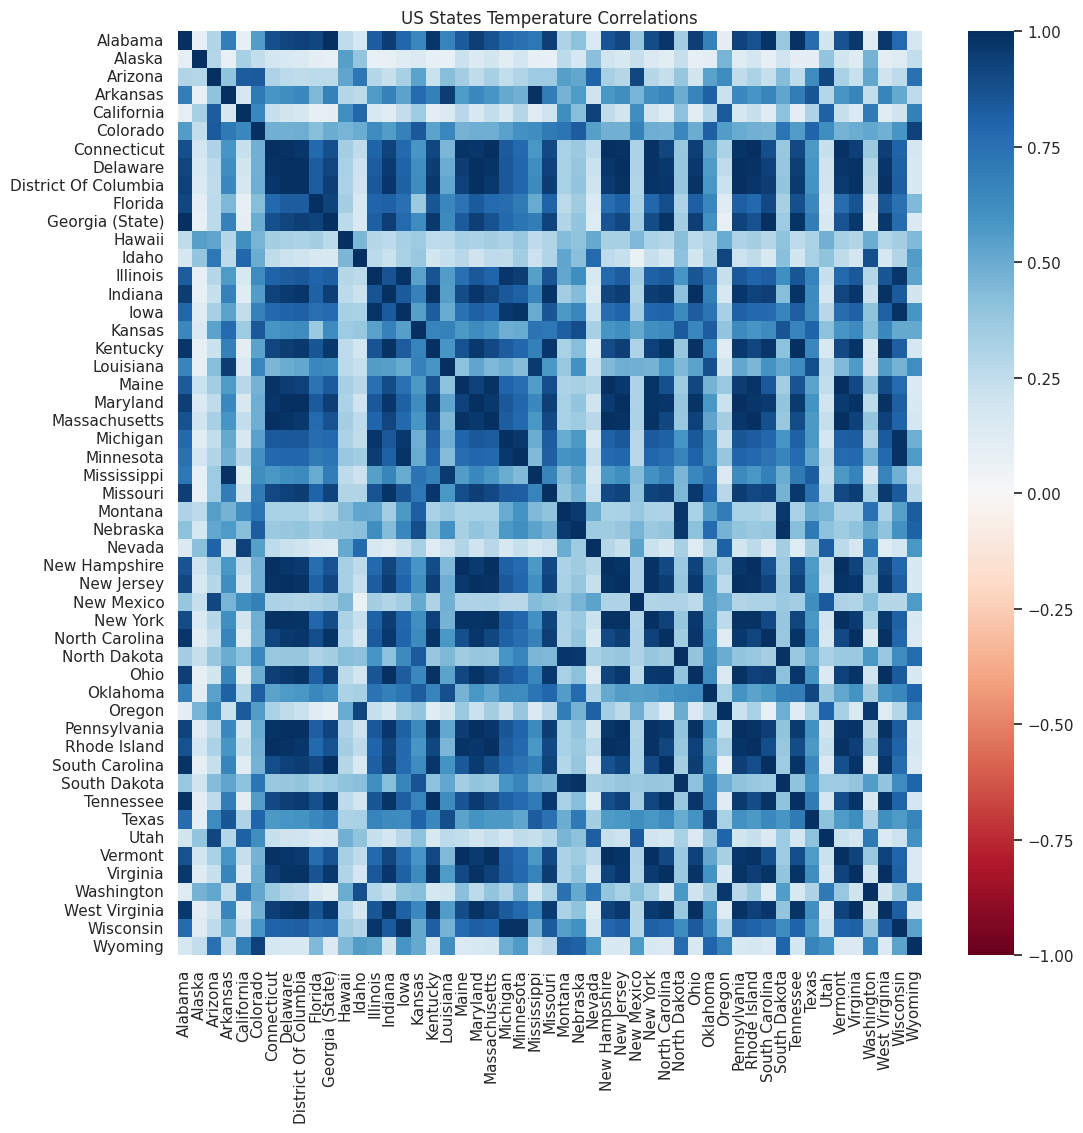

In [ ]:
sns.set(
    style="white",
    rc={'figure.figsize': (12, 12)}
)

ax = sns.heatmap(
    data=corr_mat,
    vmin=-1,
    vmax=1,
    cmap="RdBu",
    xticklabels=True,
    yticklabels=True
)

ax.set(
    title="US States Temperature Correlations"
)

We can see that the states generally have strongly positively correlated temperatures. This makes sense as they are all part of the same region of the world.

###**Temperature Seasonality Visualization**

In this section we visualize the role of seasonality in our temperature data. This is done specifically for the US country-level temperatures and for the US state Utah's state-level temperatures. As representative examples, we plot the temperatures between 2000 and 2013 and also specifically for the year 2005 for each case.

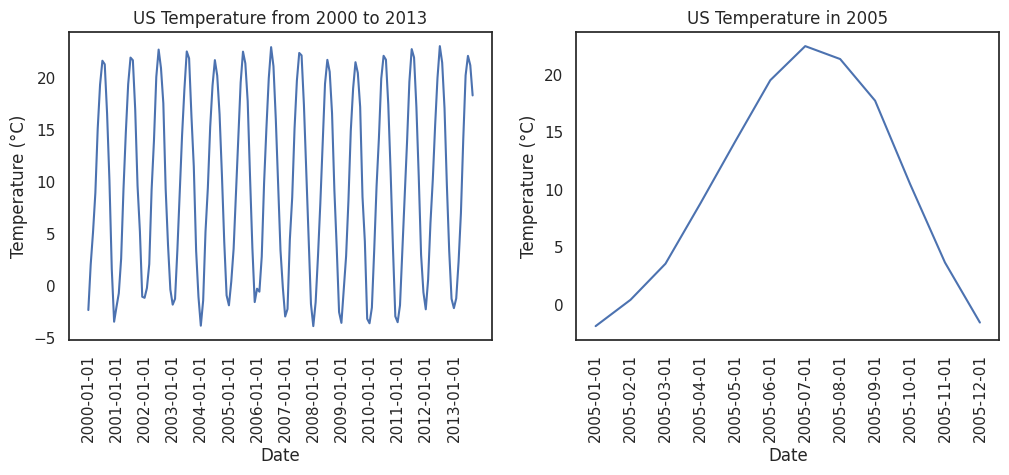

In [ ]:
q3 = """SELECT dt, AverageTemperature, Country FROM tempByCountry_df
        WHERE Country = "United States"
        AND dt >= "2000-01-01" """
long_df = pysqldf(q3)
q3 = """SELECT dt, AverageTemperature, Country FROM tempByCountry_df
        WHERE Country = "United States"
        AND dt >= "2005-01-01" AND  dt < "2006-01-01" """
year_df = pysqldf(q3)

figure = plt.figure(figsize=(12, 4))

# Subplot 1
figure.add_subplot(1, 2, 1)
plt.plot(long_df["dt"], long_df["AverageTemperature"]) # Plot the chart
labels = [ "200"+str(i)+"-01-01" if i < 10 else "20"+str(i)+"-01-01" for i in range(0,14)]
plt.xticks(labels, rotation ='vertical')
plt.ylabel("Temperature (°C)")
plt.xlabel("Date")
plt.title('US Temperature from 2000 to 2013')

# Subplot 2
figure.add_subplot(1, 2, 2)
plt.plot(year_df["dt"], year_df["AverageTemperature"]) # Plot the chart
plt.xticks(rotation ='vertical')
plt.ylabel("Temperature (°C)")
plt.xlabel("Date")
plt.title('US Temperature in 2005')

plt.show()  # Display

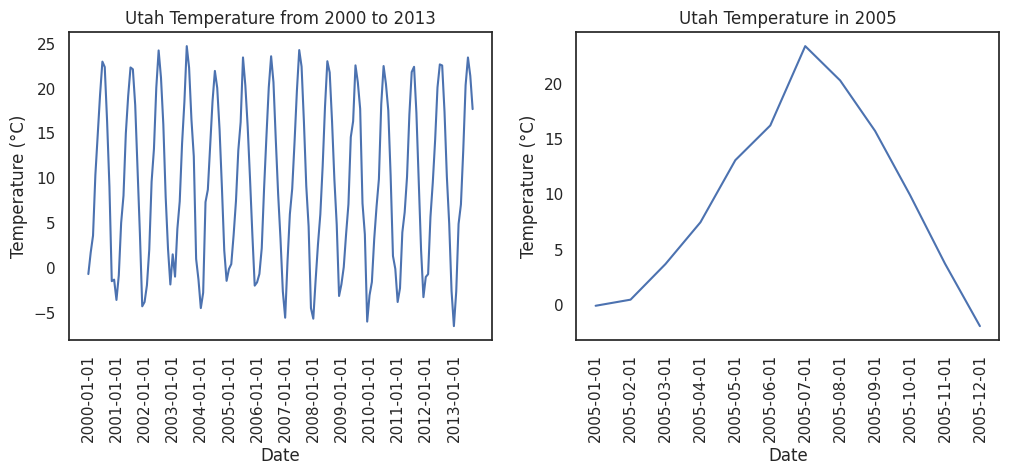

In [ ]:
q3 = """SELECT dt, AverageTemperature FROM tempByState_df
        WHERE Country = "United States" AND State = "Utah"
        AND dt >= "2000-01-01" """
long_df = pysqldf(q3)
q3 = """SELECT dt, AverageTemperature FROM tempByState_df
        WHERE Country = "United States" AND State = "Utah"
        AND dt >= "2005-01-01" AND  dt < "2006-01-01" """
year_df = pysqldf(q3)

figure = plt.figure(figsize=(12, 4))

# Subplot 1
figure.add_subplot(1, 2, 1)
plt.plot(long_df["dt"], long_df["AverageTemperature"])  # Plot the chart
labels = [ "200"+str(i)+"-01-01" if i < 10 else "20"+str(i)+"-01-01" for i in range(0,14)]
plt.xticks(labels, rotation ='vertical')
plt.ylabel("Temperature (°C)")
plt.xlabel("Date")
plt.title('Utah Temperature from 2000 to 2013')

# Subplot 2
figure.add_subplot(1, 2, 2)
plt.plot(year_df["dt"], year_df["AverageTemperature"])  # Plot the chart
plt.xticks(rotation ='vertical')
plt.ylabel("Temperature (°C)")
plt.xlabel("Date")
plt.title('Utah Temperature in 2005')

plt.show()  # display

As can be seen in both cases, temperatures are generally low in the winter season, high in the summer season, and follow a consistent trend regardless of the year. This suggests the dominance of seasonality in the temperature data.

#**US Temperature vs. Development Indicators**

In this section we join the temperature data with the indicators data to explore the relationship between them. This is done specifically for the US.

###**Temperature vs. Development Indicators Correlations**

We begin by preprocessing the temperature data to obtain average annual temperatures for each year for the US. This is needed as the indicators data is yearly, and hence we need to ensure the temperature data is also yearly in order to join the datasets.

In [ ]:
# Create a copy of the dataframe to avoid overwriting
df_temperatures_US = tempByCountry_df.copy()
# Filter on US
df_temperatures_US = df_temperatures_US[df_temperatures_US["Country"] == "United States"]
# Project on necessary columns
df_temperatures_US = df_temperatures_US[["dt", "AverageTemperature"]]
# Rename columns
df_temperatures_US = df_temperatures_US.rename(columns={"dt": "date", "AverageTemperature": "temp"})
# Convert the 'date' column to datetime format
df_temperatures_US["date"] = pd.to_datetime(df_temperatures_US["date"])
# Set the index to the 'date' column
df_temperatures_US = df_temperatures_US.set_index("date")
# Extract the year from the date
df_temperatures_US["year"] = df_temperatures_US.index.year
# Filter to only include data for years before 2013. This is needed as we only have partial data (upto September) for 2013
df_temperatures_US = df_temperatures_US[df_temperatures_US["year"] < 2013]
# Drop the index
df_temperatures_US = df_temperatures_US.reset_index(drop=True)
# Compute the average annual temperatures using groupby
df_temperatures_US = df_temperatures_US.groupby(by="year", as_index=False).mean()
df_temperatures_US.head()

year      temp
0  1768   5.57275
1  1769  10.44650
2  1770       NaN
3  1771       NaN
4  1772       NaN

Also, the indicators data contains stacked data where each row contains data for a given indicator as per the `IndicatorName` column. For ease of use, we preprocess the indicator data so that each indicator has it's own column.

In [ ]:
# Create a copy of the dataframe to avoid overwriting
df_indicators_US = df_indicators.copy()
# Filter on US
df_indicators_US = df_indicators_US[df_indicators_US["CountryName"] == "United States"]
# Drop the index
df_indicators_US = df_indicators_US.reset_index(drop=True)

data = {"year": []}
for k in df_indicators_US["IndicatorName"].unique():
    data[k] = []

prev_year = -float("inf")
for i, row in df_indicators_US.iterrows():
    if prev_year != row["Year"]:
        prev_year = row["Year"]
        for k in data:
            data[k].append(row["Year"] if k == "year" else np.nan)
    data[row["IndicatorName"]][-1] = row["Value"]

df_indicators_US = pd.DataFrame.from_dict(data)
df_indicators_US.head()

year  Adolescent fertility rate (births per 1,000 women ages 15-19)  \
0  1960                                            84.9872               
1  1961                                            82.7346               
2  1962                                            80.4820               
3  1963                                            77.9506               
4  1964                                            75.4192               

   Age dependency ratio (% of working-age population)  \
0                                          66.524844    
1                                          67.061661    
2                                          67.134768    
3                                          66.848286    
4                                          66.340524    

   Age dependency ratio, old (% of working-age population)  \
0                                          15.230264         
1                                          15.421149         
2                                          15.564257         
3                                          15.663833         
4                                          15.716311         

   Age dependency ratio, young (% of working-age population)  \
0                                          51.294580           
1                                          51.640512           
2                                          51.570510           
3                                          51.184453           
4                                          50.624214           

   Alternative and nuclear energy (% of total energy use)  \
0                                           1.261261        
1                                           1.334758        
2                                           1.430062        
3                                           1.365391        
4                                           1.400595        

   Arms exports (SIPRI trend indicator values)  \
0                                 5.961000e+09   
1                                 6.376000e+09   
2                                 5.725000e+09   
3                                 9.029000e+09   
4                                 1.207700e+10   

   Arms imports (SIPRI trend indicator values)  \
0                                  219000000.0   
1                                  238000000.0   
2                                  264000000.0   
3                                  358000000.0   
4                                  366000000.0   

   Birth rate, crude (per 1,000 people)  Changes in inventories (current LCU)  \
0                                  23.7                          3.200000e+09   
1                                  23.3                          3.000000e+09   
2                                  22.4                          6.100000e+09   
3                                  21.7                          5.600000e+09   
4                                  21.1                          4.800000e+09   

   ...  Time required to start a business (days)  \
0  ...                                       NaN   
1  ...                                       NaN   
2  ...                                       NaN   
3  ...                                       NaN   
4  ...                                       NaN   

   Time to prepare and pay taxes (hours)  Time to resolve insolvency (years)  \
0                                    NaN                                 NaN   
1                                    NaN                                 NaN   
2                                    NaN                                 NaN   
3                                    NaN                                 NaN   
4                                    NaN                                 NaN   

   Total tax rate (% of commercial profits)  \
0                                       NaN   
1                                       NaN   
2                                       NaN   
3                  

We now calculate correlations between temperature and the indicators and display them for some interesting indicators.

In [ ]:
# Merge the temperature and indicators data
df_merged = df_indicators_US.merge(df_temperatures_US, on="year")

# Drop columns with less than 30 (non nan values) to ensure adequate base size
# to calculate correlations
cols_to_drop = []
for col in df_merged.columns:
    if sum(df_merged[col].apply(lambda x: not np.isnan(x))) < 30:
        cols_to_drop.append(col)

df_merged = df_merged.drop(columns=cols_to_drop)
df_merged.head()

# Calculate correlations
correlations = {}
for col in df_merged.columns.to_list()[1:-1]:
    correlations[col] = df_merged[col].corr(df_merged["temp"])
correlations_lst = sorted(correlations.items(), key=lambda t: t[1], reverse=True)
correlations_lst = [t for t in correlations_lst if not np.isnan(t[1])]
indicators = [t[0] for t in correlations_lst]
correlations = [t[1] for t in correlations_lst]

# Display correlations
df_corr = pd.DataFrame().from_dict({"Indicator": indicators, "Correlation": correlations})
with pd.option_context('display.max_colwidth', None):
    display(df_corr[df_corr["Indicator"].isin(['GDP per capita (current US$)', 'GNI (current US$)', 'Population, total', 'Electricity production from hydroelectric sources (% of total)', 'CO2 emissions (kt)'])])

Indicator  \
16                                     GDP per capita (current US$)   
25                                                GNI (current US$)   
74                                               CO2 emissions (kt)   
151  Electricity production from hydroelectric sources (% of total)   
153                                               Population, total   

     Correlation  
16      0.749918  
25      0.740119  
74      0.651685  
151    -0.744576  
153     0.738324

Some interesting observations we can make include:
*   GDP, GNI, and Population are strongly positively correlated to temperature. This makes sense as an increase in any of these indicators is associated with higher production/comsumption and therefore with potentially higher greenhouse gas emissions (which of course depends on the energy source). This in turn causes increasing temperatures.
*   Higher electricity production from hydrooelectric sources is strongly negatively correlated with temperature. This also makes sense as hydroelectric power is a renewable resource and is intended to  mitigate global warming.
*   Carbon dioxide emissions are strongly positively correlated to temperature. This once again makes sense as it is a greenhouse gas and therefore a cause of global warming.


###**Temperature vs. Development Indicators Simple Regressions**

Having looked into the correlations, we now visualize some of these relationships to get a better idea of their significance. The following plots show regression lines and correlations between temperature and selected development indicators

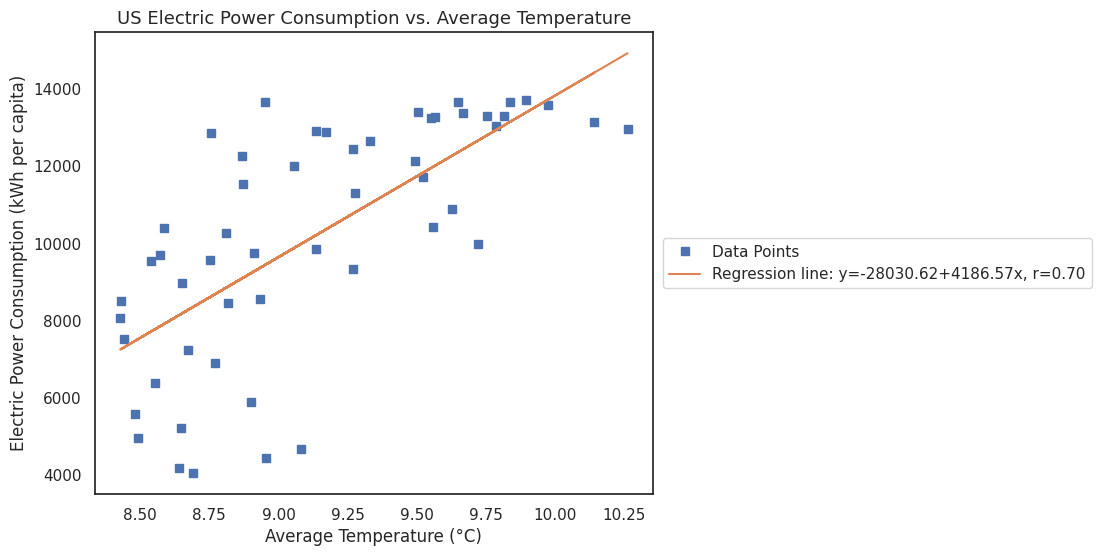

In [ ]:
q3 = """ SELECT * FROM df_indicators
        WHERE CountryName = "United States"
    """
US_indicators_df = pysqldf(q3)

q3 = """ With temp1 as (SELECT dt, strftime('%Y', dt) as year, AverageTemperature, Country FROM tempByCountry_df
        WHERE Country = "United States"
        AND dt >= "1900-01-01"),
        weather as (SELECT year, Avg(AverageTemperature) as AverageTemp
        FROM temp1
        group by year), 
        ind as (SELECT Year, IndicatorName, Value FROM US_indicators_df
        WHERE CountryName = "United States"
        AND IndicatorName = "Electric power consumption (kWh per capita)")
        SELECT weather.year, AverageTemp, Value as "Power consumption" FROM weather JOIN ind WHERE weather.year = ind.year
    """
temppower_df = pysqldf(q3)
temppower_df.head(5)
slope, intercept, r, p, stderr = scipy.stats.linregress(temppower_df["AverageTemp"], temppower_df["Power consumption"])
line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}' 
fig, ax = plt.subplots()
fig.set_figheight(6)
fig.set_figwidth(8)
ax.plot(temppower_df["AverageTemp"], temppower_df["Power consumption"], linewidth=0, marker='s', label='Data Points')
ax.plot(temppower_df["AverageTemp"], intercept + slope * temppower_df["AverageTemp"], label=line)
ax.set_xlabel('Average Temperature (°C)')
ax.set_ylabel('Electric Power Consumption (kWh per capita)')
ax.set_title('US Electric Power Consumption vs. Average Temperature', fontsize = 13)
pos = ax.get_position()
ax.set_position([pos.x0, pos.y0, pos.width * 0.9, pos.height])
ax.legend(loc='center right', bbox_to_anchor=(1.8, 0.5))
plt.show()

Above we see a strong positive correlation between power consumption and temperature, which is to be expected.

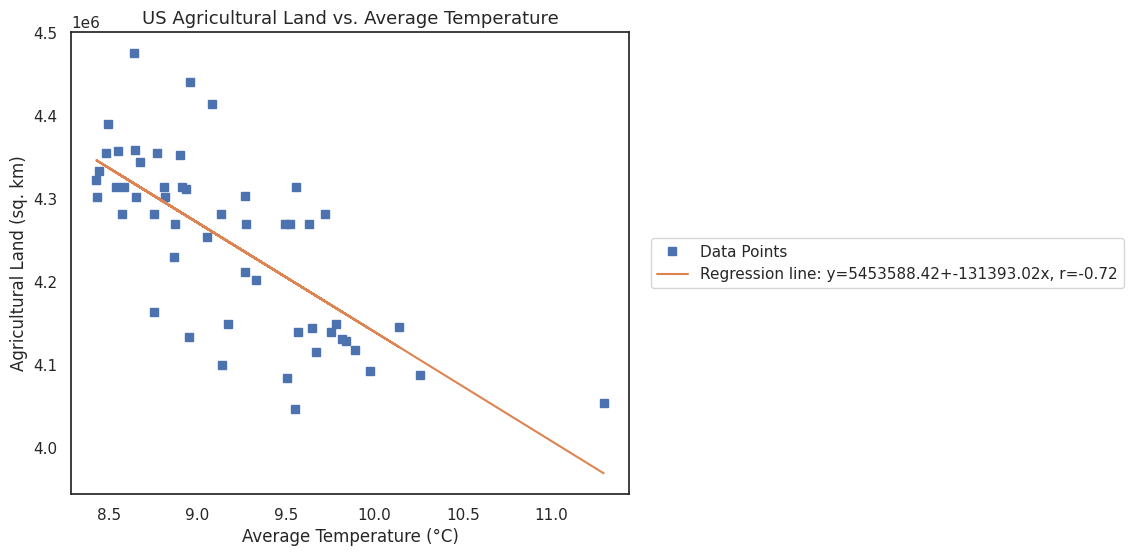

In [ ]:
q3 = """ With temp1 as (SELECT dt, strftime('%Y', dt) as year, AverageTemperature, Country FROM tempByCountry_df
        WHERE Country = "United States"
        AND dt >= "1900-01-01"),
        weather as (SELECT year, Avg(AverageTemperature) as AverageTemp
        FROM temp1
        group by year), 
        ind as (SELECT Year, IndicatorName, Value FROM US_indicators_df
        WHERE CountryName = "United States"
        AND IndicatorName = "Agricultural land (sq. km)")
        SELECT weather.year, AverageTemp, Value FROM weather JOIN ind WHERE weather.year = ind.year
    """
temppower_df = pysqldf(q3)
temppower_df.head(5)
slope, intercept, r, p, stderr = scipy.stats.linregress(temppower_df["AverageTemp"], temppower_df["Value"])
line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'
fig, ax = plt.subplots()
fig.set_figheight(6)
fig.set_figwidth(8)
ax.plot(temppower_df["AverageTemp"], temppower_df["Value"], linewidth=0, marker='s', label='Data Points')
ax.plot(temppower_df["AverageTemp"], intercept + slope * temppower_df["AverageTemp"], label=line)
ax.set_xlabel('Average Temperature (°C)')
ax.set_ylabel('Agricultural Land (sq. km)')
ax.set_title('US Agricultural Land vs. Average Temperature', fontsize = 13)
pos = ax.get_position()
ax.set_position([pos.x0, pos.y0, pos.width * 0.9, pos.height])
ax.legend(loc='center right', bbox_to_anchor=(1.9, 0.5))
plt.show()

Trying a different indicator like agricultural land size, we see a slightly higher (absolute) correlation coefficient of -0.72.

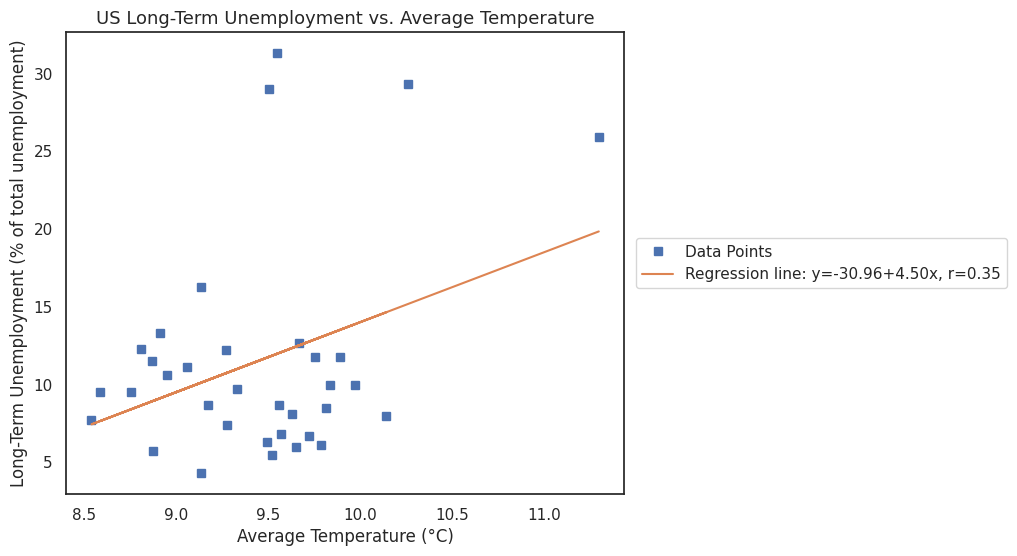

In [ ]:
q3 = """ With temp1 as (SELECT dt, strftime('%Y', dt) as year, AverageTemperature, Country FROM tempByCountry_df
        WHERE Country = "United States"
        AND dt >= "1900-01-01"),
        weather as (SELECT year, Avg(AverageTemperature) as AverageTemp
        FROM temp1
        group by year), 
        ind as (SELECT Year, IndicatorName, Value FROM US_indicators_df
        WHERE CountryName = "United States"
        AND IndicatorName = "Long-term unemployment (% of total unemployment)")
        SELECT weather.year, AverageTemp, Value FROM weather JOIN ind WHERE weather.year = ind.year
    """
temppower_df = pysqldf(q3)
temppower_df.head(5)
slope, intercept, r, p, stderr = scipy.stats.linregress(temppower_df["AverageTemp"], temppower_df["Value"])
line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'
fig, ax = plt.subplots()
fig.set_figheight(6)
fig.set_figwidth(8)
ax.plot(temppower_df["AverageTemp"], temppower_df["Value"], linewidth=0, marker='s', label='Data Points')
ax.plot(temppower_df["AverageTemp"], intercept + slope * temppower_df["AverageTemp"], label=line)
ax.set_xlabel('Average Temperature (°C)')
ax.set_ylabel('Long-Term Unemployment (% of total unemployment)')
ax.set_title('US Long-Term Unemployment vs. Average Temperature', fontsize = 13)
pos = ax.get_position()
ax.set_position([pos.x0, pos.y0, pos.width * 0.9, pos.height])
ax.legend(loc='center right', bbox_to_anchor=(1.7, 0.5))
plt.show()

Finally, we decided to visualize the correlation of an indicator we believed to be unrelated to temperature. As expected, this gives us a lower correlation coefficient of 0.35.

#**Modelling**

In this section we build models to forecast temperature. We aim to test our models on US country-level and the US state Pennsylvania (PA) state-level temperature data.

We begin with a traditional time-series model called SARIMA. We build two models, one for the US data, and one for the PA data.

We then work with three sequential deep learning models:
*   Recurrent Neural Network (RNN)
*   Long Short-Term Memory (LSTM)
*   Gated Recurrent Unit (GRU)

Given that the deep learning models are data-intensive, we train each of the models on all the (global) country-level data and separately on all the US state-level data. As before, the models are tested on the US and PA data.

Finally, we compare model performances with each other and some baselines.

##**Seasonal Autoregressive Integrated Moving Average (SARIMA)**

In previous sections we have seen the dominant influence of seasonality on temperature data. As such, we focus on an extension of the ARIMA model called Seasonal Autoregressive Integrated Moving Average (SARIMA). This is an extension that explicitly supports univariate time series data with a seasonal component. In addition to the autoregressive (p), differencing (d), and moving average (q) hyperparameters of ARIMA, it adds three new hyperparameters for the seasonal component of the series, as well as an additional parameter for the period of the seasonality. These are as follows:
*   P: Seasonal autoregressive order
*   D: Seasonal difference order
*   Q: Seasonal moving average order
*   m: The number of time steps for a single seasonal period

For further details see [here](https://machinelearningmastery.com/sarima-for-time-series-forecasting-in-python/).

We fit the model on the US and PA temperature data in turn.

We begin by installing and importing necessary packages.

In [ ]:
# Install packages
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 26.0 MB/s eta 0:00:00


In [ ]:
# Import packages
from math import sqrt
import pmdarima as pm # https://pypi.org/project/pmdarima/
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

We now preprocess both the US and PA temperature data.

In [ ]:
# Create a copy of the dataframe to avoid overwriting
df_temperatures_US = tempByCountry_df.copy()
# Filter on US
df_temperatures_US = df_temperatures_US[df_temperatures_US["Country"] == "United States"]
# Project on necessary columns
df_temperatures_US = df_temperatures_US[["dt", "AverageTemperature"]]
# Rename columns
df_temperatures_US = df_temperatures_US.rename(columns={"dt": "date", "AverageTemperature": "temp"})
# Convert the 'date' column to datetime format
df_temperatures_US["date"] = pd.to_datetime(df_temperatures_US["date"])
# Set the index to the 'date' column
df_temperatures_US = df_temperatures_US.set_index("date")
# Extract the month from the date
df_temperatures_US["month"] = df_temperatures_US.index.month
# Extract the year from the date
df_temperatures_US["year"] = df_temperatures_US.index.year
df_temperatures_US.head()

temp  month  year
date                           
1768-09-01  15.420      9  1768
1768-10-01   8.162     10  1768
1768-11-01   1.591     11  1768
1768-12-01  -2.882     12  1768
1769-01-01  -3.952      1  1769

In [ ]:
# Create a copy of the dataframe to avoid overwriting
df_temperatures_PA = tempByState_df.copy()
# Filter on Pennsylvania
df_temperatures_PA = df_temperatures_PA[(df_temperatures_PA["Country"] == "United States") & (df_temperatures_PA["State"] == "Pennsylvania")]
# Project on necessary columns
df_temperatures_PA = df_temperatures_PA[["dt", "AverageTemperature"]]
# Rename columns
df_temperatures_PA = df_temperatures_PA.rename(columns={"dt": "date", "AverageTemperature": "temp"})
# Convert the 'date' column to datetime format
df_temperatures_PA["date"] = pd.to_datetime(df_temperatures_PA["date"])
# Set the index to the 'date' column
df_temperatures_PA = df_temperatures_PA.set_index("date")
# Extract the month from the date
df_temperatures_PA["month"] = df_temperatures_PA.index.month
# Extract the year from the date
df_temperatures_PA["year"] = df_temperatures_PA.index.year
df_temperatures_PA.head()

temp  month  year
date                          
1743-11-01  2.795     11  1743
1743-12-01    NaN     12  1743
1744-01-01    NaN      1  1744
1744-02-01    NaN      2  1744
1744-03-01    NaN      3  1744

Below we can see that both datasets have all non-null values starting from 1820. Hence, to avoid the issue of dealing with null-values, we filter out data before 1820. This stilll leaves us with ~200 years worth of monthly temperature data to train our models on.

In [ ]:
print(f"Last US null value timestamp: {df_temperatures_US[df_temperatures_US['temp'].isnull()].index.max()}")
print(f"Last PA null value timestamp: {df_temperatures_PA[df_temperatures_PA['temp'].isnull()].index.max()}")
df_temperatures_US = df_temperatures_US["1820":]
df_temperatures_PA = df_temperatures_PA["1820":]

Last US null value timestamp: 1819-12-01 00:00:00
Last PA null value timestamp: 1780-12-01 00:00:00


###**Helper Functions**

Before proceeding with the modelling, we define some helper functions below. This will be helpful as the modelling steps for the US and PA data are nearly identical.

In [ ]:
def plot_temperatures(df):
    """
    Generates three plots of the temperature data.
    1) Temperature vs. Time
    2) Average Temperature vs. Month (the average temperature for a month is the
    average of the temperatures for all years for that month)
    3) Average Annual Temperature vs. Time & Rolling Mean (of 10 years) of 
    Average Annual Temperature vs. Time
    """
    plt.figure(figsize=(15, 8))

    # Temperature vs. Time
    ax1 = plt.subplot2grid(shape=(3, 1), loc=(0, 0))
    sns.lineplot(x=df.index, y=df["temp"], ax=ax1)
    ax1.set_xlabel("Year")
    ax1.set_ylabel("Temperature (°C)")
    ax1.set_title("Temperature vs. Time")

    # Average Temperature vs. Month
    ax2 = plt.subplot2grid(shape=(3, 1), loc=(1, 0))
    pd.pivot_table(df, values="temp", index="month", columns="year", aggfunc="mean").mean(axis=1).plot(marker="o", ax=ax2)
    ax2.set_xlabel("Month")
    ax2.set_ylabel("Temperature (°C)")
    ax2.set_xticks(range(1, 13))
    ax2.set_xticklabels(["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
    ax2.set_title("Average Temperature vs. Month")

    # Average Annual Temperature vs. Time & 
    # Rolling Mean (of 10 years) of Average Annual Temperature vs. Time
    ax3 = plt.subplot2grid(shape=(3, 1), loc=(2, 0))
    data = pd.pivot_table(df, values="temp", index="year", aggfunc="mean")
    data["rolling_temp"] = data["temp"].rolling(10).mean()
    data[["temp", "rolling_temp"]].plot(ax=ax3)
    ax3.set_xlabel("Year")
    ax3.set_ylabel("Temperature (°C)")
    ax3.set_title("Average Annual Temperature & Rolling Mean (of 10 years) of Average Annual Temperature vs. Time")

    plt.tight_layout()

In [ ]:
def train_test_split(df, test_size):
    """
    Splits data into train and test sets. As this is for time-series modelling, 
    the last `test_size` entries in `df` form the test set.
    """
    train = df[:-test_size].copy()
    test = df[-test_size:].copy()
    return train, test

In [ ]:
def get_statistics(temps):
    """
    Prints the results of performing the Augmented Dickey-Fuller test. Also
    generates the Autocorrelation (ACF) and Partial Autocorrelation (PACF) 
    plots. This is needed to choose the model hyperparameters.
    """
    result = adfuller(temps)
    print("Augmented Dickey-Fuller Test Results:")
    print(f"Test Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    print(f"No. of lags used: {result[2]}")
    print(f"No. of observations used for ADF regression and calculation of critical values: {result[3]}")
    for k, v in result[4].items():
        print(f"Critical value ({k}): {v}")
    print("")

    plt.figure(figsize=(15, 6))
    
    ax1 = plt.subplot2grid(shape=(2, 2), loc=(0, 0), colspan=2)
    temps.plot(ax=ax1)
    ax1.set_xlabel("Year")
    ax1.set_ylabel("Temperature (°C)")
    ax1.set_title("Temperature vs. Time")

    ax2 = plt.subplot2grid(shape=(2, 2), loc=(1, 0))
    plot_acf(temps, ax=ax2, lags=48, zero=False)
    ax2.set_xlabel("Lag")

    ax3 = plt.subplot2grid(shape=(2, 2), loc=(1, 1))
    plot_pacf(temps, ax=ax3, lags=48, method="ywm", zero=False)
    ax3.set_xlabel("Lag")

    plt.tight_layout()

In [ ]:
def rmse(y_true, y_pred):
    """
    Returns root mean-squared error of predictions.
    """
    return sqrt((y_true - y_pred).pow(2).sum() / len(y_true))

In [ ]:
def test_model(test_df, model):
    """
    Tests the model. Note that `test_df` is modified in-place.
    """
    test_df["pred"] = model.predict(test_df.shape[0])
    test_df["error"] = test_df["temp"] - test_df["pred"]

    # Print root mean-squared error
    print(f"RMSE: {rmse(test_df['temp'], test_df['pred'])}")

    plt.figure(figsize=(15, 6))

    # Ground Truth & Predicted Temperatures vs. Time
    ax1 = plt.subplot2grid(shape=(2, 1), loc=(0, 0))
    ax1.plot(test_df.index, test_df["temp"], label="Ground Truth")
    ax1.plot(test_df.index, test_df["pred"], label="Prediction")
    ax1.set_xlabel("Time")
    ax1.set_ylabel("Temperature (°C)")
    ax1.set_title("Ground Truth & Predicted Temperatures vs. Time")
    ax1.legend(loc="best")

    # Q-Q Plot
    ax2 = plt.subplot2grid(shape=(2, 1), loc=(1, 0))
    sm.graphics.qqplot(test_df["error"], line="r", ax=ax2)
    ax2.set_title("Q-Q Plot")
        
    plt.tight_layout()

###**US Model**

For modelling we begin by replotting the US temperature data (for details on what each plot represents, please see the `plot_temperatures` helper function).

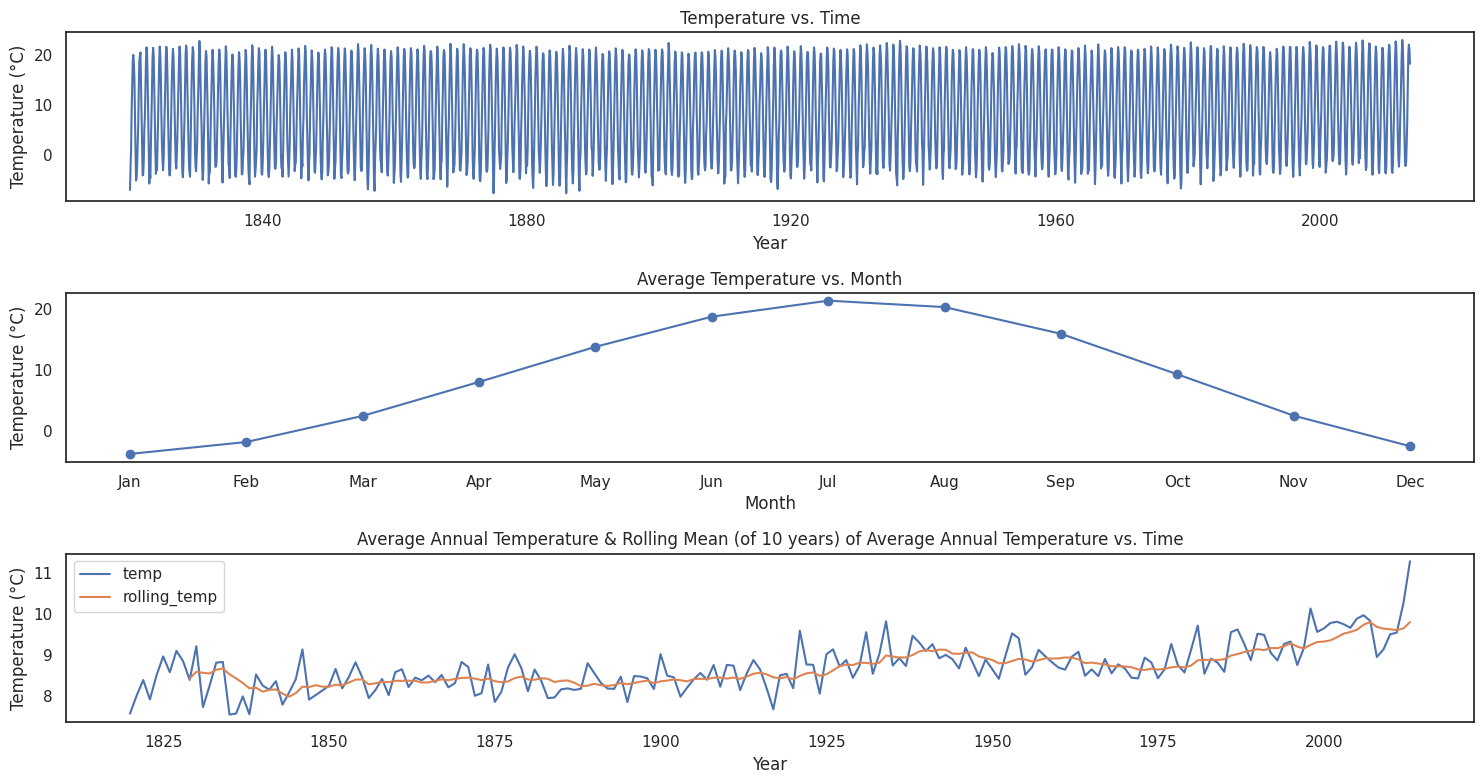

In [ ]:
plot_temperatures(df_temperatures_US)

We make the following observations from the above plots:
*   Similar to what we have shown previously, the middle plot shows that there is a clear seasonality in the data. Starting from a minimum around January, temperatures smoothly increase until July, and then smoothly decrease back to a minimum in December.
*   The gently rising rolling mean in the bottom plot suggests a slow and gradual impact of global warming.

We now split the data into train and test sets. The last 50 observations form the test set. As the data is monthly, the test set is ~4 years worth of data.

In [ ]:
train_US, test_US = train_test_split(df_temperatures_US, test_size=50)

We now print the results of performing the Augmented Dickey-Fuller (ADF) test on the train data, and also generate Autocorrelation (ACF) and Partial Autocorrelation (PACF) plots on the same. 

*(Note: The ACF plot shows the correlations between current temperatures and lagged versions of themselves. Likewise, the PACF plot shows the correlations between current temperatures and lagged versions of themselves, excluding the effects of intermediate lags. For further details see [here](https://towardsdatascience.com/interpreting-acf-and-pacf-plots-for-time-series-forecasting-af0d6db4061c).)*

Augmented Dickey-Fuller Test Results:
Test Statistic: -4.653114058048012
p-value: 0.00010298157636627562
No. of lags used: 27
No. of observations used for ADF regression and calculation of critical values: 2247
Critical value (1%): -3.4332635674843694
Critical value (5%): -2.8628271349445633
Critical value (10%): -2.5674552025417263



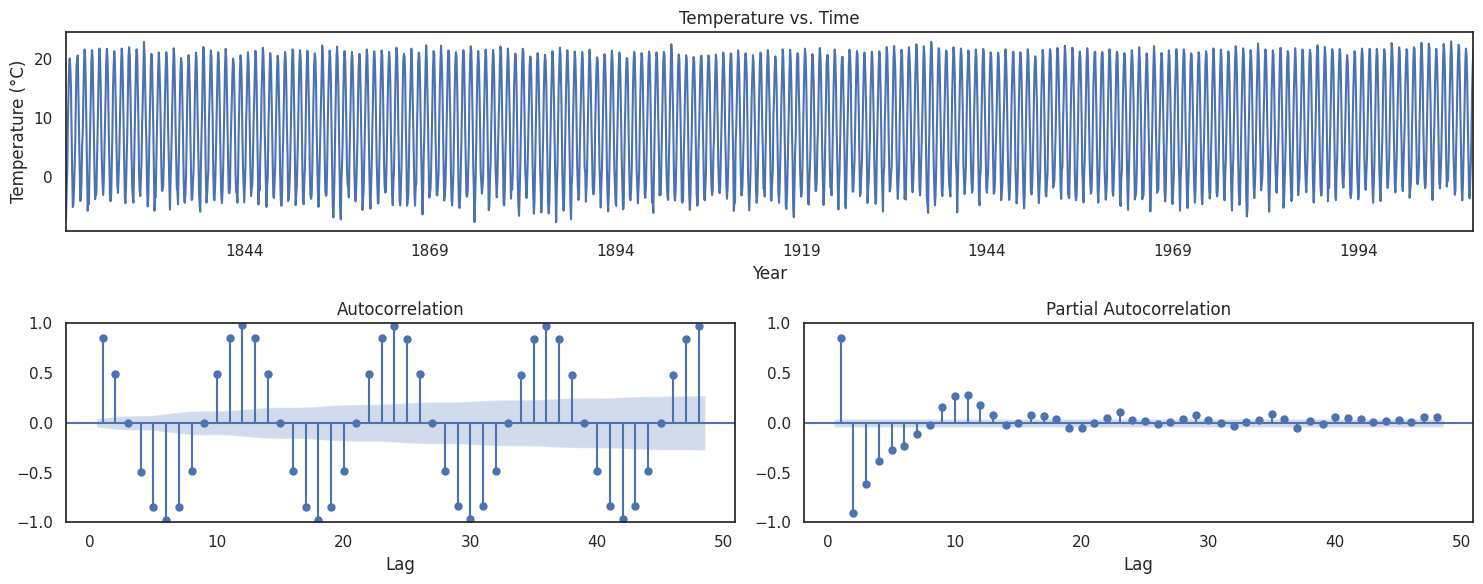

In [ ]:
get_statistics(train_US["temp"])

We make the following observations from the above results:
*   The p-value of the ADF test (with 27 lags) is close to 0, which suggests stationarity at this level.
*   The ACF plot shows a cyclical structure. The temperature at lag 6 has a high negative autocorrelation, and that at lag 12 has a high positive autocorrelation. This makes sense based on the seasonality of temperature. In particular, if we have a high temperature at present (such as in July), we should have a low temperature 6 months before (in December last year), and a high temperature 12 months before (in July last year).
*   The PACF plot shows a high positive partial autocorrelation in the first lag, and then gradually increasing negative partial autocorrelations in subsequent lags.

To simplify the hyperparameter selection process, we use the [pmdarima.arima.auto_arima](https://alkaline-ml.com/pmdarima/modules/generated/pmdarima.arima.auto_arima.html) function to automatically discover the optimal hyperparameters. We set the function's `seasonal` parameter to `True` to ensure that it fits a seasonal ARIMA model. We also set the function's `m` parameter to `12`, thereby defining a season as 12 months.

In [ ]:
model_US = pm.auto_arima(train_US["temp"], seasonal=True, m=12)
model_US

ARIMA(order=(0, 0, 1), scoring_args={}, seasonal_order=(1, 0, 1, 12),
      suppress_warnings=True)

We can see that the search has selected moving average and seasonal moving average terms of 1, and a seasonal autoregressive term of 1.

Finally, we evaluate model performance on the test data.

RMSE: 0.9012874298332246


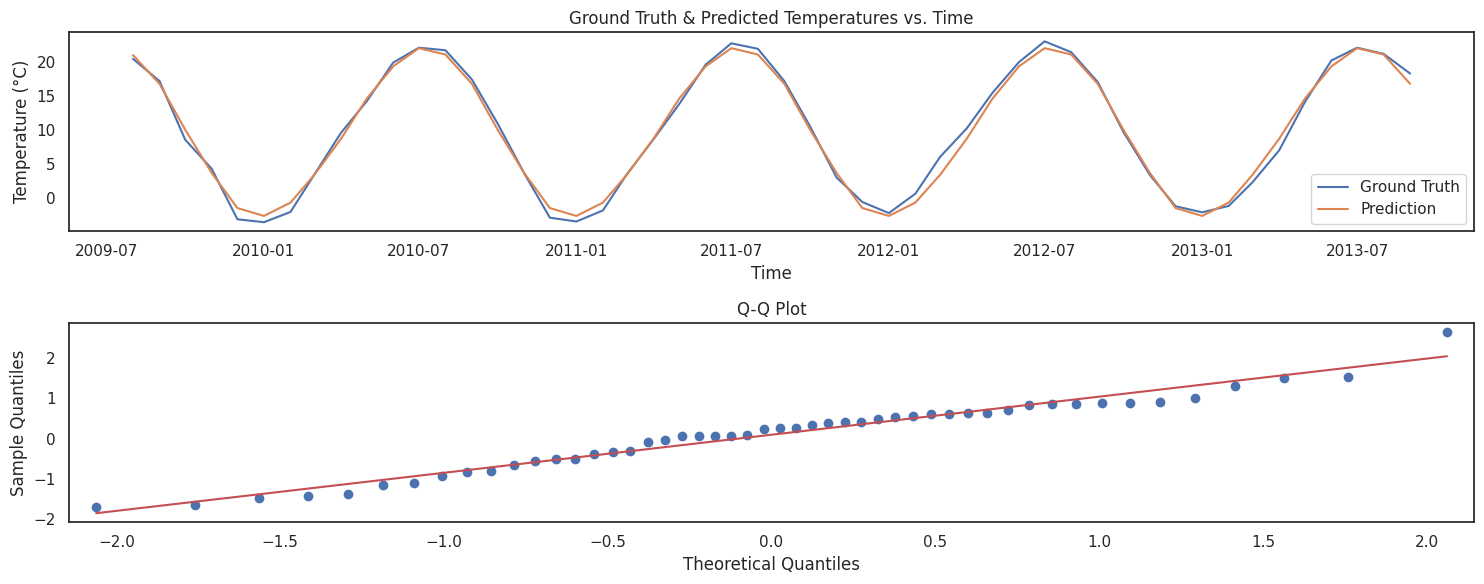

In [ ]:
test_model(test_US, model_US)

We can see that the RMSE on the test data is quite low (~0.901), which suggests a good model fit. This is also reflected in the first plot, where the predicted temperatures faithfully trace the ground truths. Likewise, the Q-Q plot for the error term (the difference between the ground truth and the prediction) is relatively linear, which suggests that the error is approximately Gaussian.

###**PA Model**

The modelling for PA follows an identical process as that of the US, so we show the steps with limited comments to avoid repetition. We begin by plotting the PA temperature data.

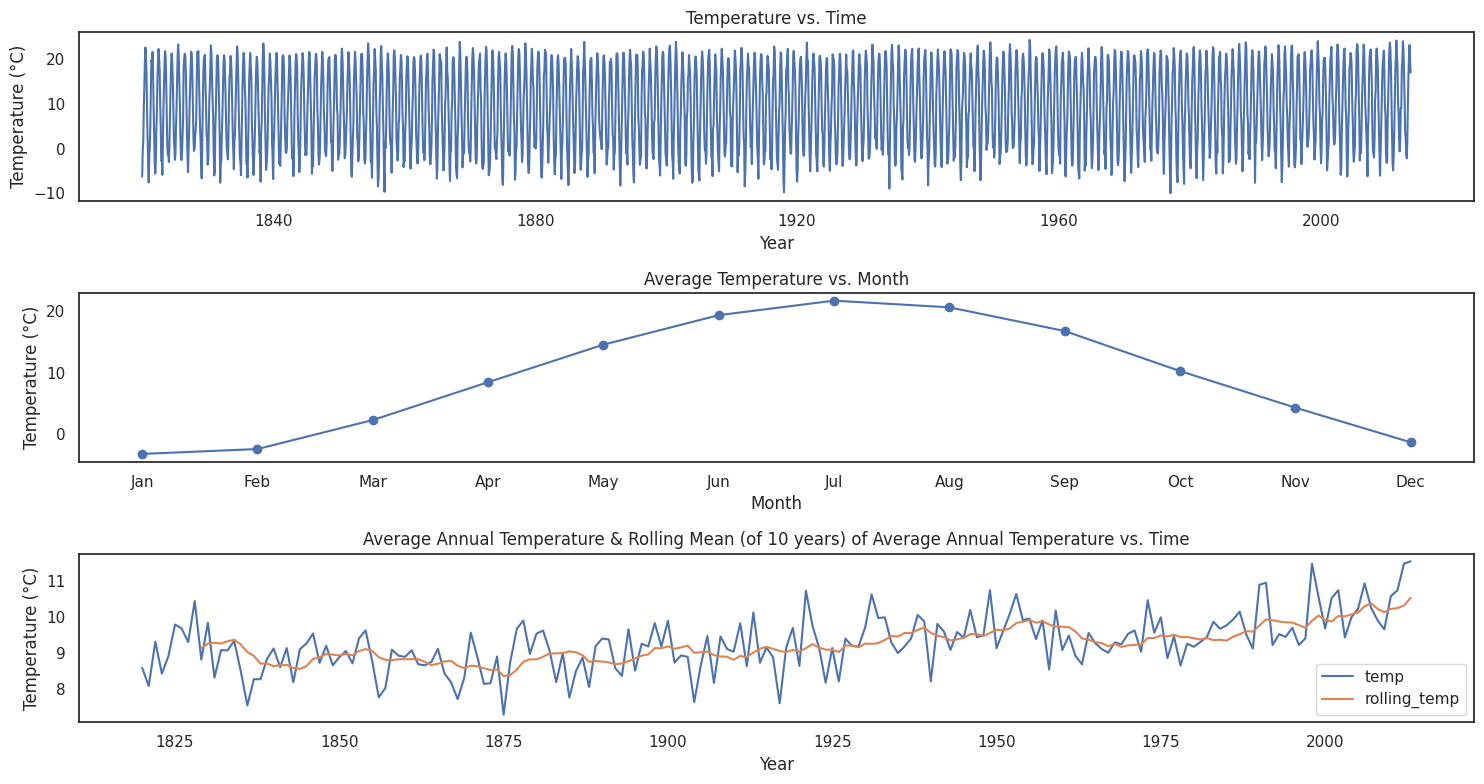

In [ ]:
plot_temperatures(df_temperatures_PA)

The above plots have the same general structure as those for the US. In particular, we can see the seasonality in the temperature data and a gently rising rolling mean.

We now split the data into train and test sets. As before, the last 50 observations form the test set.

In [ ]:
train_PA, test_PA = train_test_split(df_temperatures_PA, 50)

We now print the results of performing the ADF test on the train data, and also generate ACF and PACF plots on the same. 

Augmented Dickey-Fuller Test Results:
Test Statistic: -5.312489109662768
p-value: 5.1587326179646285e-06
No. of lags used: 26
No. of observations used for ADF regression and calculation of critical values: 2248
Critical value (1%): -3.433262269928937
Critical value (5%): -2.8628265619996323
Critical value (10%): -2.5674548974889504



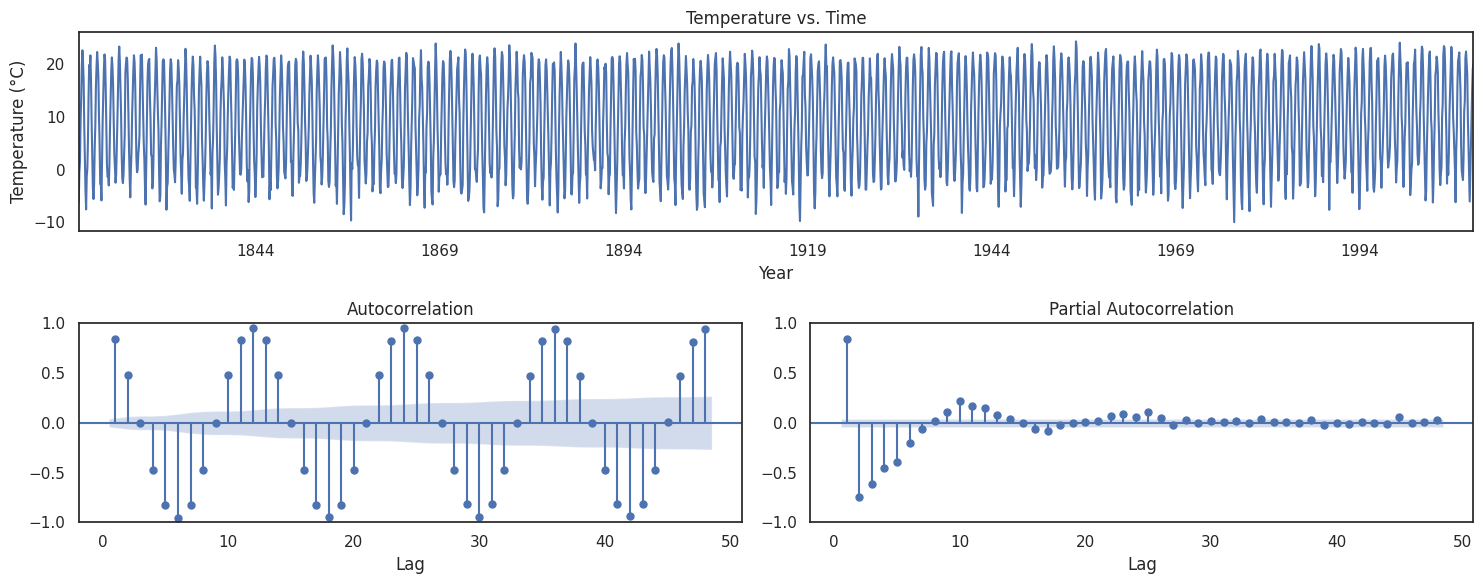

In [ ]:
get_statistics(train_PA["temp"])

We can see that the ACF and PACF plots have the same behavior as those for the US data. 

We now train the model using the `pmdarima.arima.auto_arima` function. As before, we set the `seasonal` parameter to `True` and the `m` parameter to `12`.

In [ ]:
model_PA = pm.auto_arima(train_PA["temp"], seasonal=True, m=12)
forecasts_PA = model_PA.predict(test_PA.shape[0])
model_PA

ARIMA(order=(5, 0, 1), scoring_args={}, seasonal_order=(0, 0, 2, 12),
      suppress_warnings=True)

We can see that the search has selected an autoregressive term of 5, a moving average term of 1, and a seasonal moving average term of 2.

Finally, we evaluate model performance on the test data.

RMSE: 3.0621072171258525


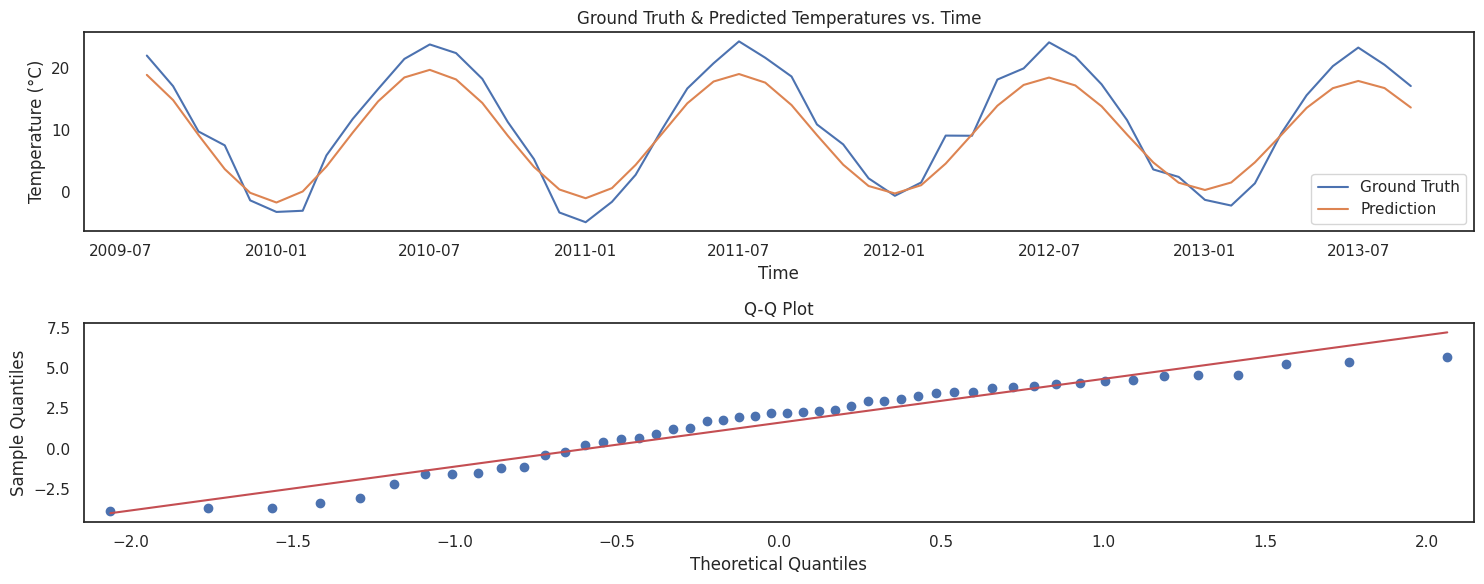

In [ ]:
test_model(test_PA, model_PA)

We can see that the RMSE on the test data is not quite as low as in the case for the US (~3.062), which suggests a not as good model fit. In the first plot above we can see that the predicted temperatures are able to capture the periodicity of the grouth truths, but fail to align with the ground truths especially at the troughs and crests. Also, the Q-Q plot for the error term (the difference between the ground truth and the prediction) is relatively linear, which suggests that the error is approximately Gaussian.

##**Deep Learning**

We will first import some libraries we need to run our deep learning models

In [ ]:
from datetime import timedelta
import torch
import torch.nn as nn
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

Next, we will define our device (CPU or GPU) as well as some hyperparameters we will be using

In [ ]:
# Define device (GPU or CPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

# Hyperparameters 
num_epochs = 20
batch_size = 10
learning_rate = 0.001
hidden_size = 100
num_layers = 2

input_size = 50
output_size = 50
sequence_length = 5

cuda


###**Helper Functions and Class Declarations**

Here we define a helper function that takes in the dataframe with US state data that we will load into memory, transforms it by extracting the AverageTemperature and corresponding datetime values of each state, and returns the data (grouped by state) in a dictionary where the key is the state name.

In [ ]:
def create_state_data_dict(input_df):
  unique_states = input_df['State'].unique()
  state_data = {}
  for state in unique_states:
    state_df = input_df[input_df['State'] == state]
    state_temps = state_df['AverageTemperature']
    state_dates = state_df['dt']
    state_data[state] = (state_dates, state_temps)
  return state_data, unique_states

Here we define a helper function that takes in the dataframe with country level data that we will into memory, transforms it by extracting the AverageTemperature and corresponding datetime values of each country, and returns the data (grouped by country) in a dictionary where the key is the country name.

In [ ]:
def create_country_data_dict(input_df):
  unique_countries = input_df['Country'].unique()
  country_data = {}
  for country in unique_countries:
    country_df = input_df[input_df['Country'] == country]
    country_temps = country_df['AverageTemperature']
    country_dates = country_df['dt']
    country_data[country] = (country_dates, country_temps)
  return country_data, unique_countries

Here we define a helper function that we will use to create pairs of input and output sequences for our model using the state (or country) level dictionary created by `create_state_data_dict` or `create_country_data_dict`. When creating these pairs of input/output sequences, we will discard any sequence where there is a NaN value in the input or output.


In [ ]:
# Create input sequences and output sequences without NaN values
def create_input_output_seqs(state_data):
  input_sequences = []
  input_sequences_dates = []
  input_sequences_states = []
  output_sequences = []
  output_sequences_dates = []
  output_sequences_states = []
  
  for state in state_data:
    state_inputs = []
    state_inputs_dates = []
    state_outputs = []
    state_outputs_dates = []

    state_datetime_data = state_data[state][0]
    state_temp_data = state_data[state][1]

    numVals = len(state_temp_data)
    temperatureValues = state_temp_data

    idx = 0
    # Use a sliding window to obtain input/output pairs from temperature data 
    while (idx + (input_size + output_size) <= numVals):
      currInput = temperatureValues[idx:idx+input_size]
      currInputDates = state_datetime_data[idx:idx+input_size]

      currOutput = temperatureValues[idx+input_size:idx+input_size+output_size]
      currOutputDates = state_datetime_data[idx+input_size:idx+input_size+output_size]
      
      # Convert all datetime objects to strings 
      inputDatesToAppend = []
      outputDatesToAppend = []
      for curr_date in currInputDates:
        inputDatesToAppend.append(str(curr_date.strftime('%Y-%m-%d %X')))
      for curr_date in currOutputDates: 
        outputDatesToAppend.append(str(curr_date.strftime('%Y-%m-%d %X')))

      state_inputs.append(currInput)
      state_inputs_dates.append(inputDatesToAppend)
      state_outputs.append(currOutput)
      state_outputs_dates.append(outputDatesToAppend)      
      idx = idx + 10 

    # Create sequences
    index = 0
    while (index + sequence_length <= len(state_inputs)):
      input_sequence = state_inputs[index:index+sequence_length]
      output_sequence = state_outputs[index+sequence_length - 1]
      input_sequence_dates = state_inputs_dates[index:index+sequence_length]
      output_sequence_dates = state_outputs_dates[index+sequence_length - 1]

      input_sequence_list = []
      for input in input_sequence: 
        input_sequence_list.append(input.tolist())
      output_sequence_list = output_sequence.tolist() 

      containsNAN_anywhere = False
      for series in input_sequence: # type of seq = list
        if (series.isna().any() == True):
          containsNAN_anywhere = True 
          break
      if (output_sequence.isna().any() == True):
        containsNAN_anywhere = True 
      
      if (containsNAN_anywhere == False):
        input_sequences.append(input_sequence_list)
        output_sequences.append(output_sequence_list)
        input_sequences_dates.append(input_sequence_dates)
        output_sequences_dates.append(output_sequence_dates)
        input_sequences_states.append(state) 
        output_sequences_states.append(state)
      index += 1

  print(type(input_sequences_dates))

  input_data_toReturn = (input_sequences, input_sequences_dates, input_sequences_states)
  output_data_toReturn = (output_sequences, output_sequences_dates, output_sequences_states) 
  return (input_data_toReturn, output_data_toReturn)

Below, we define a custom Dataset class because we would like to also know the state/country name as well as the corresponding dates when loading in the batch input/output sequences from the dataloader.

In [ ]:
class CustomDataset(Dataset):
  def __init__(self, input_sequences, input_dates, input_states, output_sequences, output_dates, output_states):
    self.input_sequences = input_sequences 
    self.input_dates = input_dates 
    self.input_states = input_states
    
    self.output_sequences = output_sequences 
    self.output_dates = output_dates 
    self.output_states = output_states 

  def __len__(self):
    return self.input_sequences.shape[0]
  def __getitem__(self, idx):
    return self.input_sequences[idx], self.input_dates[idx], self.input_states[idx], self.output_sequences[idx], self.output_dates[idx], self.output_states[idx]


Since the batch dataloader reorders the input/output dates, we also needed to create a helper function to reorder the input/output dates from the batch dataloader back into its expected format.

In [ ]:
def reorder_batch_input_dates(input_dates):
  num_sequences_per_sample = len(input_dates) # 5
  num_dates_per_seq = len(input_dates[0]) # 50
  num_samples = len(input_dates[0][0]) # 10

  all_samples = []
  # input_dates = sample num, day num, seq_num 
  for sample_num in range(num_samples):
    curr_sample_seqs = []
    for seq_num in range(num_sequences_per_sample): 
      curr_seq_dates = []
      for day_num in range(num_dates_per_seq):
        curr_seq_dates.append(input_dates[seq_num][day_num][sample_num])
      curr_sample_seqs.append(curr_seq_dates) 
    all_samples.append(curr_sample_seqs)
  
  return all_samples 

def reorder_batch_output_dates(output_dates):
  num_output_dates = len(output_dates)
  num_samples = len(output_dates[0])
  dates = []
  for i in range(num_samples):
    curr_sample_dates = []
    for j in range(num_output_dates):
      curr_sample_dates.append(output_dates[j][i])
    dates.append(curr_sample_dates)
  return dates 

Below, we define the RNN, LSTM, and GRU models used/initialized later.

In [ ]:
# Define Model
class Model_RNN(nn.Module):
  def __init__(self, input_size, hidden_size, num_layers, output_size):
    super(Model_RNN, self).__init__()
    self.input_size = input_size 
    self.hidden_size = hidden_size 
    self.num_layers = num_layers 
    self.output_size = output_size 
    # batch_first = True --> inputs = (batch_size, sequence_length, )
    self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True)
    self.fc = nn.Linear(hidden_size, output_size)
  
  def forward(self, x):
    h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)
    out, _ = self.rnn(x, h0) 
    out = out[:, -1, :]
    out = self.fc(out) 
    return out

class Model_LSTM(nn.Module):
  def __init__(self, input_size, hidden_size, num_layers, output_size):
    super(Model_LSTM, self).__init__()
    self.input_size = input_size 
    self.hidden_size = hidden_size 
    self.num_layers = num_layers 
    self.output_size = output_size 
    # batch_first = True --> inputs = (batch_size, sequence_length, )
    self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True) 
    self.fc = nn.Linear(hidden_size, output_size)
  
  def forward(self, x):
    h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)
    c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)
    out, _ = self.lstm(x, (h0, c0))
    out = out[:, -1, :]
    out = self.fc(out) 
    return out

class Model_GRU(nn.Module):
  def __init__(self, input_size, hidden_size, num_layers, output_size):
    super(Model_GRU, self).__init__()
    self.input_size = input_size 
    self.hidden_size = hidden_size 
    self.num_layers = num_layers 
    self.output_size = output_size 
    # batch_first = True --> inputs = (batch_size, sequence_length, )
    self.gru = nn.GRU(input_size, hidden_size, num_layers, batch_first=True)
    self.fc = nn.Linear(hidden_size, output_size)
  
  def forward(self, x):
    h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)
    c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)
    out, _ = self.gru(x, h0)
    out = out[:, -1, :]
    out = self.fc(out) 
    return out

In an effort to reduce repetitive code, we also defined a helper function for training and testing models.

In [ ]:
# Create helper function for training and evaluation/testing 
def train_test_model(model, criterion, optimizer, num_epochs, trainingDataloader, testingDataloader):
  for epoch_num in range(num_epochs):
    epoch_loss = 0.0 

    for batch_num, data in enumerate(trainingDataloader, 0):
      # Unpack inputs and outputs
      # inputs = torch.Size([batch_size, sequence_length, input_size])
      # labels = torch.Size([batch_size, output_size])
      input_sequences, input_dates, input_states, label_sequence, output_dates, output_states = data

      # Zero gradients 
      optimizer.zero_grad()

      # Forward propagation 
      outputs = model(input_sequences)

      # Backpropagation + weight updates
      loss = criterion(outputs, label_sequence)
      loss.backward()
      optimizer.step() 
      epoch_loss += loss.item()
    
    print("Epoch: " + str(epoch_num) + ", Loss: ", str(epoch_loss))

  with torch.no_grad():
    test_loss = 0.0
    for batch_num, data in enumerate(testingDataloader):
      input_sequences, input_dates, input_states, label_sequence, output_dates, output_states = data
      outputs = model(input_sequences)
      loss = criterion(outputs, label_sequence)
      test_loss += loss.item()
    print("Test loss: ", test_loss)

Below, we create a helper function for writing our predictions (at the country or state level) to a CSV file so the deep learning model predictions can be compared to the ARIMA model predictions.

In [ ]:
import csv
def write_to_csv(filename, data):
  with open(filename, 'w') as f:
      # using csv.writer method from CSV package
      write = csv.writer(f)
      write.writerow(['data'])
      for thing in data:
        write.writerow([thing])

###**State Level**

####**Load and Preprocess Data**

For our state level models, we'll first load the data into memory.

In [ ]:
df_state_data = pd.read_csv("GlobalLandTemperaturesByState.csv")

Then, we will preprocess the data. this involves first filtering out any data where the country is not the United States, then splitting the dataset into a training and testing set, where any data before August 1st, 2009 is in the training set, and any data on or after August 1st, 2009 is in the testing set (this ensures that the test set has the same size and time range as that for the ARIMA models). Lastly, the data for each state is grouped together with a call to the `create_state_data_dict` function. 

In [ ]:
df_state_data[['dt']] = df_state_data[['dt']].apply(pd.to_datetime)
df_state_data = df_state_data[df_state_data['Country'] == 'United States']

dates = df_state_data['dt'].sort_values(ascending=True)
dates = dates.unique() 
prediction_date_start = np.datetime64('2009-08-01') #### year-day-month
dates_index = np.where(dates == prediction_date_start)[0][0]
train_test_cutoff_idx = dates_index - input_size - 10*(sequence_length - 1) 
train_test_cutoff_date = dates[train_test_cutoff_idx]

df_state_data_train = df_state_data[df_state_data['dt'] < train_test_cutoff_date]
df_state_data_test = df_state_data[df_state_data['dt'] >= train_test_cutoff_date]

state_data_train, unique_states_train = create_state_data_dict(df_state_data_train) 
state_data_test, unique_states_test = create_state_data_dict(df_state_data_test)

Once we have split the data into training/testing and grouped the data together by state, we will need to create pairs of input/output sequences we can use for training, as well as put the data into tensors so they can be used in a DataLoader for batch training.

In [ ]:
input_data_train, output_data_train = create_input_output_seqs(state_data_train) 
input_data_test, output_data_test = create_input_output_seqs(state_data_test) 

input_sequences_training = torch.tensor(input_data_train[0]).to(device) # 8372 by 5 by 50 
input_sequences_training_dates = input_data_train[1] # 8372 by 5 by 50 
input_sequences_training_states = input_data_train[2] # 8372 (state for each training input sequence)

output_sequences_training = torch.tensor(output_data_train[0]).to(device) # 8372 by 50 
output_sequences_training_dates = output_data_train[1] # 8372 by 50 
output_sequences_training_states = output_data_train[2] # 8372

input_sequences_testing = torch.tensor(input_data_test[0]).to(device) # 3009 by 5 by 50
input_sequences_testing_dates = input_data_test[1]  # 3009 by 5 by 50
input_sequences_testing_states = input_data_test[2]  # 3009

output_sequences_testing = torch.tensor(output_data_test[0]).to(device) # 3009 by 50
output_sequences_testing_dates = output_data_test[1] # 3009 by 50 
output_sequences_testing_states = output_data_test[2] # 3009

<class 'list'>
<class 'list'>


Here we use the Dataset we previously defined as well as the DataLoader provided by PyTorch to create training and testing dataloader objects that we can use to iterate over later when training/testing. 

In [ ]:
trainingDataset = CustomDataset(input_sequences_training, input_sequences_training_dates, input_sequences_training_states, output_sequences_training, output_sequences_training_dates, output_sequences_training_states)
testingDataset = CustomDataset(input_sequences_testing, input_sequences_testing_dates, input_sequences_testing_states, output_sequences_testing, output_sequences_testing_dates, output_sequences_testing_states)
trainingDataloader = DataLoader(trainingDataset, batch_size=batch_size)
testingDataloader = DataLoader(testingDataset, batch_size=batch_size)

####**RNN**

In this section we train and evaluate the RNN model.

In [ ]:
# Initialize model, loss function, and optimizer
model = Model_RNN(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers, output_size=output_size).to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Train and evaluate the model
train_test_model(model, criterion, optimizer, num_epochs, trainingDataloader, testingDataloader)

Epoch: 0, Loss:  56522.608273386955
Epoch: 1, Loss:  6900.072592616081
Epoch: 2, Loss:  6343.104972243309
Epoch: 3, Loss:  5683.287390947342
Epoch: 4, Loss:  5873.64498436451
Epoch: 5, Loss:  6413.771222949028
Epoch: 6, Loss:  5830.84448492527
Epoch: 7, Loss:  5678.115172803402
Epoch: 8, Loss:  5775.142397403717
Epoch: 9, Loss:  5886.46673566103
Epoch: 10, Loss:  5512.607470273972
Epoch: 11, Loss:  5528.737834811211
Epoch: 12, Loss:  5529.904901325703
Epoch: 13, Loss:  5649.7128229141235
Epoch: 14, Loss:  5296.805410087109
Epoch: 15, Loss:  5241.194985687733
Epoch: 16, Loss:  5345.988020539284
Epoch: 17, Loss:  5483.427076935768
Epoch: 18, Loss:  5476.363757491112
Epoch: 19, Loss:  5711.740669131279
Test loss:  43.70503091812134


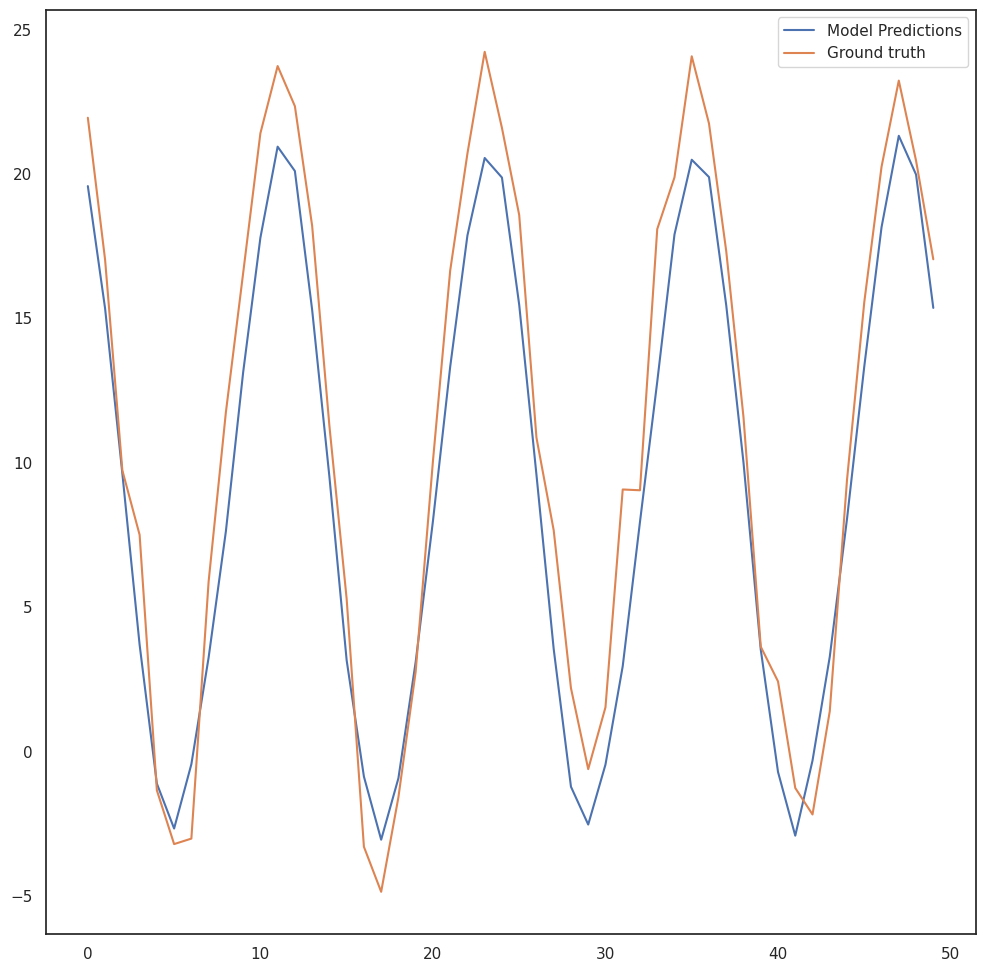

In [ ]:
filename1 = 'PA_RNN_GroundTruth.csv'
filename2 = 'PA_RNN_Predictions.csv'
filename3 = 'PA_RNN_OutputDates.csv'
with torch.no_grad():
  for batch_num, data in enumerate(testingDataloader):
    input_sequences, input_dates, input_states, label_sequence, output_dates, output_states = data
    for i in range(len(input_states)):
      if (input_states[i] == 'Pennsylvania'):
        outputs = model(input_sequences[i, :, :].unsqueeze(0))
        outputs = outputs.squeeze(0).cpu()
        ground_truth = label_sequence[i].cpu()
        # Plot for debugging purposes only. For comparisons see subsequent Model Comparison section
        plt.plot(outputs, label = "Model Predictions")
        plt.plot(ground_truth, label = "Ground truth")
        plt.legend()
        plt.show()
        
        write_to_csv(filename1, ground_truth.numpy().tolist())
        write_to_csv(filename2, outputs.numpy().tolist())
        write_to_csv(filename3, reorder_batch_output_dates(output_dates)[0])
        break

####**LSTM**


In this section we train and evaluate the LSTM model.

In [ ]:
# Initialize model, loss function, and optimizer
model = Model_LSTM(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers, output_size=output_size).to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Train and evaluate the model
train_test_model(model, criterion, optimizer, num_epochs, trainingDataloader, testingDataloader)

Epoch: 0, Loss:  65851.58841776848
Epoch: 1, Loss:  7408.646482467651
Epoch: 2, Loss:  6659.8761558532715
Epoch: 3, Loss:  5896.671629786491
Epoch: 4, Loss:  5543.374942183495
Epoch: 5, Loss:  5568.521861672401
Epoch: 6, Loss:  5281.584430575371
Epoch: 7, Loss:  5185.716708183289
Epoch: 8, Loss:  5182.886740446091
Epoch: 9, Loss:  5095.476823925972
Epoch: 10, Loss:  5190.865802526474
Epoch: 11, Loss:  5150.447812497616
Epoch: 12, Loss:  4912.290267944336
Epoch: 13, Loss:  4865.967498451471
Epoch: 14, Loss:  4947.529123723507
Epoch: 15, Loss:  4974.974271476269
Epoch: 16, Loss:  4996.7949377298355
Epoch: 17, Loss:  4902.879730820656
Epoch: 18, Loss:  4858.916900396347
Epoch: 19, Loss:  4880.759004175663
Test loss:  47.7254581451416


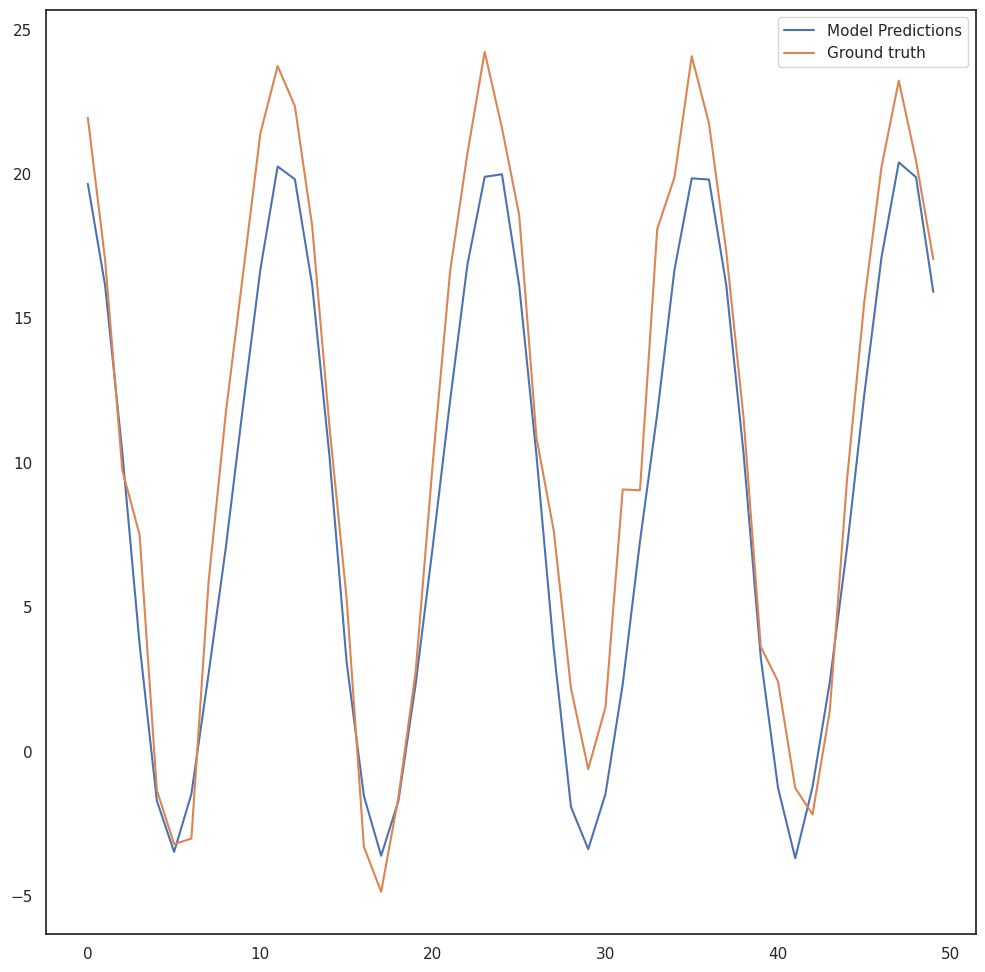

In [ ]:
filename1 = 'PA_LSTM_GroundTruth.csv'
filename2 = 'PA_LSTM_Predictions.csv'
filename3 = 'PA_LSTM_OutputDates.csv'
with torch.no_grad():
  for batch_num, data in enumerate(testingDataloader):
    input_sequences, input_dates, input_states, label_sequence, output_dates, output_states = data
    for i in range(len(input_states)):
      if (input_states[i] == 'Pennsylvania'):
        outputs = model(input_sequences[i, :, :].unsqueeze(0))
        outputs = outputs.squeeze(0).cpu()
        ground_truth = label_sequence[i].cpu()
        # Plot for debugging purposes only. For comparisons see subsequent Model Comparison section
        plt.plot(outputs, label = "Model Predictions")
        plt.plot(ground_truth, label = "Ground truth")
        plt.legend()
        plt.show()
        
        write_to_csv(filename1, ground_truth.numpy().tolist())
        write_to_csv(filename2, outputs.numpy().tolist())
        write_to_csv(filename3, reorder_batch_output_dates(output_dates)[0])
        break

####**GRU**

In this section we train and evaluate the GRU model.

In [ ]:
# Initialize model, loss function, and optimizer
model = Model_GRU(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers, output_size=output_size).to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Train and evaluate the model
train_test_model(model, criterion, optimizer, num_epochs, trainingDataloader, testingDataloader)

Epoch: 0, Loss:  63127.76925611496
Epoch: 1, Loss:  7346.7943831682205
Epoch: 2, Loss:  5844.202370762825
Epoch: 3, Loss:  5578.311653792858
Epoch: 4, Loss:  5470.358889639378
Epoch: 5, Loss:  5498.945849120617
Epoch: 6, Loss:  5530.576401054859
Epoch: 7, Loss:  5243.429840117693
Epoch: 8, Loss:  5158.844414830208
Epoch: 9, Loss:  5089.528461754322
Epoch: 10, Loss:  5003.107939630747
Epoch: 11, Loss:  4944.475222438574
Epoch: 12, Loss:  4979.643058001995
Epoch: 13, Loss:  5082.248982131481
Epoch: 14, Loss:  4979.754372566938
Epoch: 15, Loss:  4886.2669278383255
Epoch: 16, Loss:  4894.152991563082
Epoch: 17, Loss:  4890.837145417929
Epoch: 18, Loss:  4891.469770073891
Epoch: 19, Loss:  4923.298591315746
Test loss:  55.40624713897705


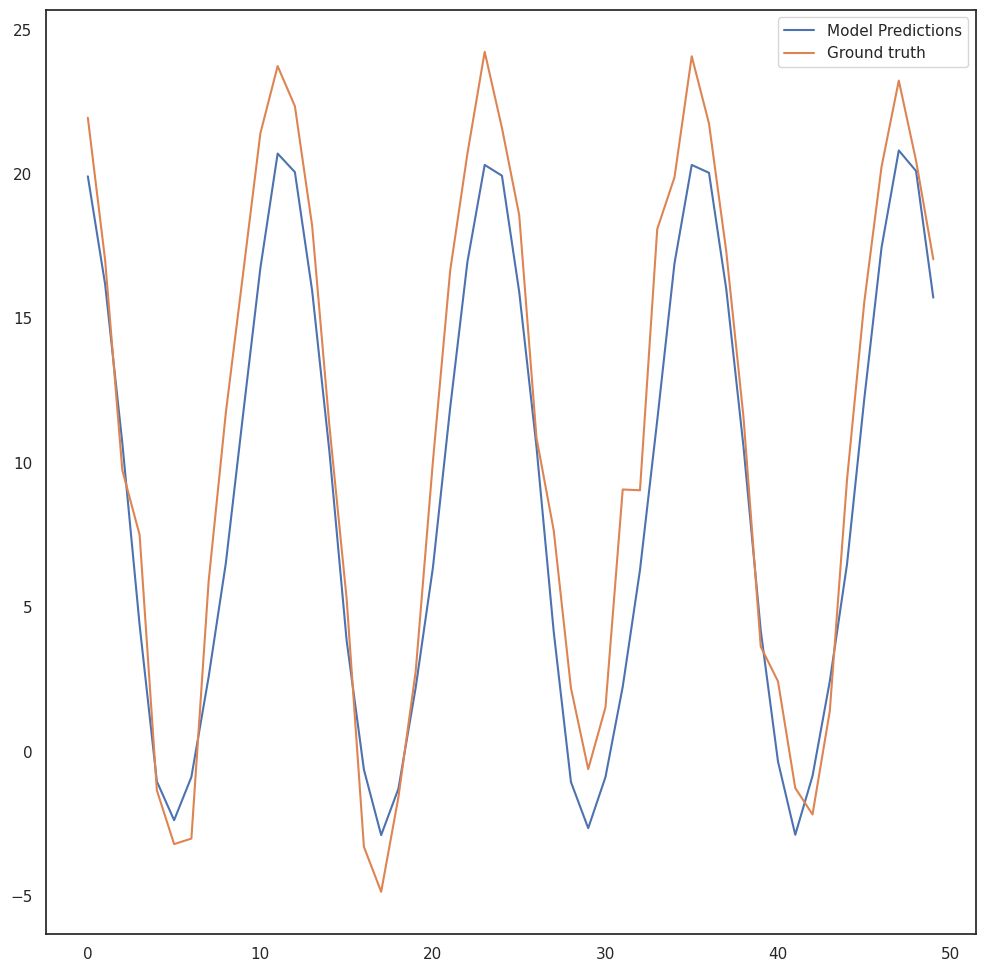

In [ ]:
filename1 = 'PA_GRU_GroundTruth.csv'
filename2 = 'PA_GRU_Predictions.csv'
filename3 = 'PA_GRU_OutputDates.csv'
with torch.no_grad():
  for batch_num, data in enumerate(testingDataloader):
    input_sequences, input_dates, input_states, label_sequence, output_dates, output_states = data
    for i in range(len(input_states)):
      if (input_states[i] == 'Pennsylvania'):
        outputs = model(input_sequences[i, :, :].unsqueeze(0))
        outputs = outputs.squeeze(0).cpu()
        ground_truth = label_sequence[i].cpu()
        # Plot for debugging purposes only. For comparisons see subsequent Model Comparison section
        plt.plot(outputs, label = "Model Predictions")
        plt.plot(ground_truth, label = "Ground truth")
        plt.legend()
        plt.show()
        
        write_to_csv(filename1, ground_truth.numpy().tolist())
        write_to_csv(filename2, outputs.numpy().tolist())
        write_to_csv(filename3, reorder_batch_output_dates(output_dates)[0])
        break

###**Country Level**

####**Load and Preprocess Data**

Below, we load the data into memory and cast all the date time strings to datetime objects.

In [ ]:
df_country = pd.read_csv("GlobalLandTemperaturesByCountry.csv")
df_country[['dt']] = df_country[['dt']].apply(pd.to_datetime)
unique_countries = list(df_country['Country'].unique())

Below, we obtain the datetime object corresponding to the date August 1st, 2009.

In [ ]:
dates = df_country['dt'].sort_values(ascending=True)
dates = dates.unique() 
prediction_date_start = np.datetime64('2009-08-01') #### year-day-month
dates_index = np.where(dates == prediction_date_start)[0][0]
train_test_cutoff_idx = dates_index - input_size - 10*(sequence_length - 1) 
train_test_cutoff_date = dates[train_test_cutoff_idx]

Below, we split the country-level dataset into a training and testing dataset. All data records with an associated date that is before August 1st, 2009 are in the training set. All records with an associated date that is on or after August 1st, 2009 are put into the testing set. 

In [ ]:
df_country_data_train = df_country[df_country['dt'] < train_test_cutoff_date]
df_country_data_test = df_country[df_country['dt'] >= train_test_cutoff_date]

Below, we create our input/output sequences for each country and put them into a DataLoader using the custom dataset class we previously defined that allows us to batch together the datetime values and state names together with the corresponding input/output sequences. 

In [ ]:
country_data_train, unique_countries_train = create_country_data_dict(df_country_data_train) 
country_data_test, unique_countries_test = create_country_data_dict(df_country_data_test)

input_data_train, output_data_train = create_input_output_seqs(country_data_train) 
input_data_test, output_data_test = create_input_output_seqs(country_data_test) 

input_sequences_training = torch.tensor(input_data_train[0]).to(device) # 8372 by 5 by 50 
input_sequences_training_dates = input_data_train[1] # 8372 by 5 by 50 
input_sequences_training_countries = input_data_train[2] # 8372 (state for each training input sequence)

output_sequences_training = torch.tensor(output_data_train[0]).to(device) # 8372 by 50 
output_sequences_training_dates = output_data_train[1] # 8372 by 50 
output_sequences_training_countries = output_data_train[2] # 8372

input_sequences_testing = torch.tensor(input_data_test[0]).to(device) # 3009 by 5 by 50
input_sequences_testing_dates = input_data_test[1]  # 3009 by 5 by 50
input_sequences_testing_countries = input_data_test[2]  # 3009

output_sequences_testing = torch.tensor(output_data_test[0]).to(device) # 3009 by 50
output_sequences_testing_dates = output_data_test[1] # 3009 by 50 
output_sequences_testing_countries = output_data_test[2] # 3009

trainingDataset = CustomDataset(input_sequences_training, input_sequences_training_dates, input_sequences_training_countries, output_sequences_training, output_sequences_training_dates, output_sequences_training_countries)
testingDataset = CustomDataset(input_sequences_testing, input_sequences_testing_dates, input_sequences_testing_countries, output_sequences_testing, output_sequences_testing_dates, output_sequences_testing_countries)
trainingDataloader = DataLoader(trainingDataset, batch_size=batch_size)
testingDataloader = DataLoader(testingDataset, batch_size=batch_size)

<class 'list'>
<class 'list'>


####**RNN**

In this section we train and evaluate the RNN model.

Epoch: 0, Loss:  89669.66006401181
Epoch: 1, Loss:  43281.83297663927
Epoch: 2, Loss:  42326.80861996114
Epoch: 3, Loss:  41199.46421174705
Epoch: 4, Loss:  40370.52993093431
Epoch: 5, Loss:  40087.19151382148
Epoch: 6, Loss:  40999.5601394102
Epoch: 7, Loss:  40285.4157423228
Epoch: 8, Loss:  38078.79078026861
Epoch: 9, Loss:  39964.2335864529
Epoch: 10, Loss:  37319.59039475024
Epoch: 11, Loss:  39258.10414516926
Epoch: 12, Loss:  37214.203998699784
Epoch: 13, Loss:  38965.268125101924
Epoch: 14, Loss:  39541.0225430578
Epoch: 15, Loss:  38032.00413547456
Epoch: 16, Loss:  35854.832982108
Epoch: 17, Loss:  37554.193297594786
Epoch: 18, Loss:  37449.80589185655
Epoch: 19, Loss:  37599.51820166409
Test loss:  32.74707221984863


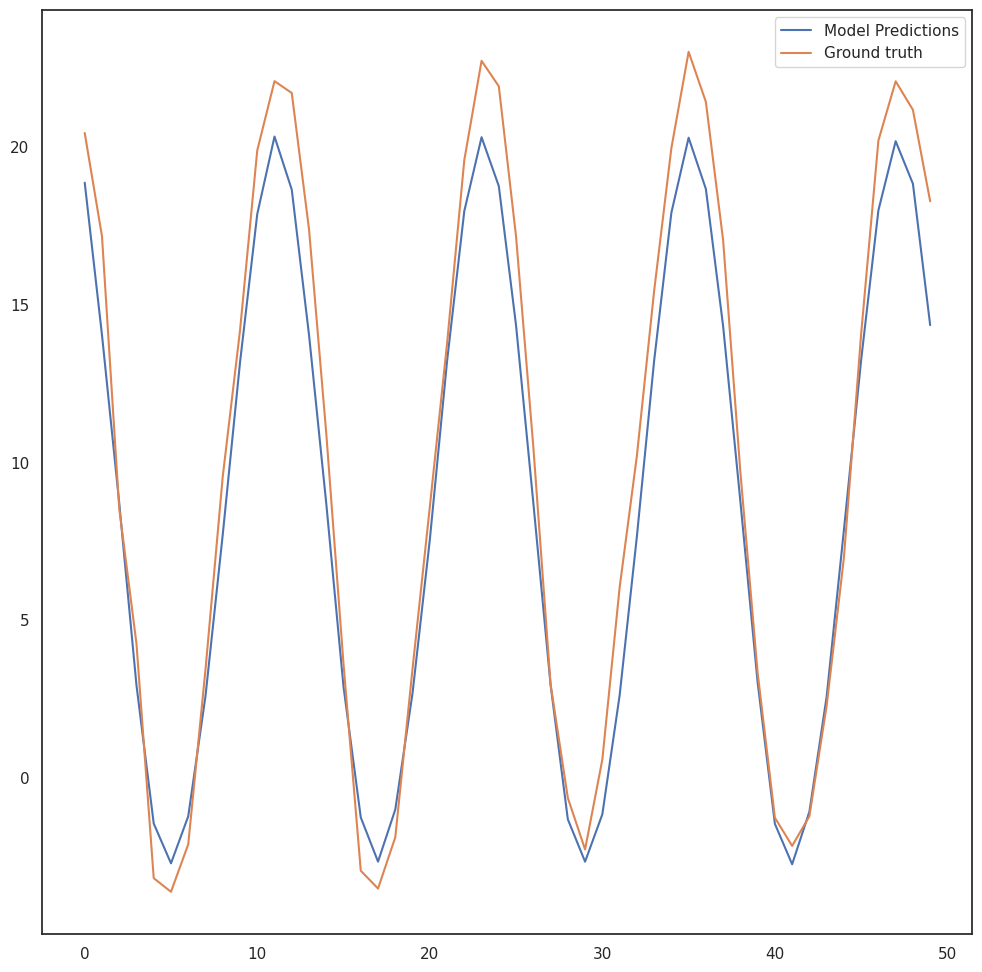

In [ ]:
# Initialize model, loss function, and optimizer
model = Model_RNN(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers, output_size=output_size).to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Train and evaluate the model
train_test_model(model, criterion, optimizer, num_epochs, trainingDataloader, testingDataloader)

filename1 = 'USA_RNN_GroundTruth.csv'
filename2 = 'USA_RNN_Predictions.csv'
filename3 = 'USA_RNN_OutputDates.csv'
with torch.no_grad():
  for batch_num, data in enumerate(testingDataloader):
    input_sequences, input_dates, input_countries, label_sequence, output_dates, output_countries = data
    for i in range(len(input_countries)):
      if (input_countries[i] == 'United States'):
        outputs = model(input_sequences[i, :, :].unsqueeze(0))
        outputs = outputs.squeeze(0).cpu()
        ground_truth = label_sequence[i].cpu()
        # Plot for debugging purposes only. For comparisons see subsequent Model Comparison section
        plt.plot(outputs, label = "Model Predictions")
        plt.plot(ground_truth, label = "Ground truth")
        plt.legend()
        plt.show()
        
        write_to_csv(filename1, ground_truth.numpy().tolist())
        write_to_csv(filename2, outputs.numpy().tolist())
        write_to_csv(filename3, reorder_batch_output_dates(output_dates)[0])
        break

####**LSTM**

In this section we train and evaluate the LSTM model.

Epoch: 0, Loss:  153181.72989539802
Epoch: 1, Loss:  40091.79168154299
Epoch: 2, Loss:  36575.43123102188
Epoch: 3, Loss:  36386.57309232652
Epoch: 4, Loss:  35687.25420536846
Epoch: 5, Loss:  33594.95884926617
Epoch: 6, Loss:  33248.55428978056
Epoch: 7, Loss:  31637.596524067223
Epoch: 8, Loss:  31800.820412270725
Epoch: 9, Loss:  31350.797087214887
Epoch: 10, Loss:  32315.285429298878
Epoch: 11, Loss:  31321.658739097416
Epoch: 12, Loss:  28548.2719854787
Epoch: 13, Loss:  28722.05778963864
Epoch: 14, Loss:  28240.567845508456
Epoch: 15, Loss:  28088.373927548528
Epoch: 16, Loss:  27184.835067667067
Epoch: 17, Loss:  27693.003548316658
Epoch: 18, Loss:  27554.82670853287
Epoch: 19, Loss:  26003.125727802515
Test loss:  58.19645404815674


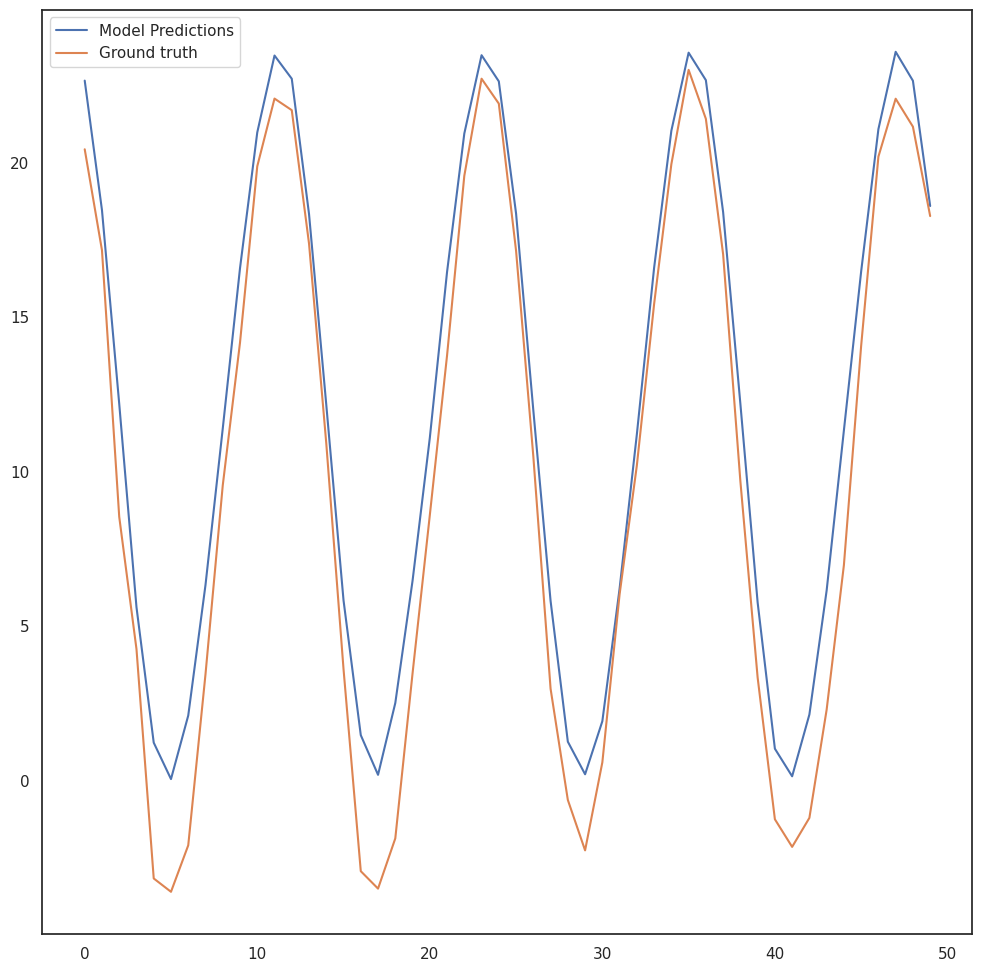

In [ ]:
# Initialize model, loss function, and optimizer
model = Model_LSTM(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers, output_size=output_size).to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Train and evaluate the model
train_test_model(model, criterion, optimizer, num_epochs, trainingDataloader, testingDataloader)

filename1 = 'USA_LSTM_GroundTruth.csv'
filename2 = 'USA_LSTM_Predictions.csv'
filename3 = 'USA_LSTM_OutputDates.csv'
with torch.no_grad():
  for batch_num, data in enumerate(testingDataloader):
    input_sequences, input_dates, input_countries, label_sequence, output_dates, output_countries = data
    for i in range(len(input_countries)):
      if (input_countries[i] == 'United States'):
        outputs = model(input_sequences[i, :, :].unsqueeze(0))
        outputs = outputs.squeeze(0).cpu()
        ground_truth = label_sequence[i].cpu()
        # Plot for debugging purposes only. For comparisons see subsequent Model Comparison section
        plt.plot(outputs, label = "Model Predictions")
        plt.plot(ground_truth, label = "Ground truth")
        plt.legend()
        plt.show()
        
        write_to_csv(filename1, ground_truth.numpy().tolist())
        write_to_csv(filename2, outputs.numpy().tolist())
        write_to_csv(filename3, reorder_batch_output_dates(output_dates)[0])
        break

####**GRU**

In this section we train and evaluate the GRU model.

Epoch: 0, Loss:  95207.67247484624
Epoch: 1, Loss:  37845.36119362712
Epoch: 2, Loss:  35076.197438403964
Epoch: 3, Loss:  34744.918120354414
Epoch: 4, Loss:  33862.66109983623
Epoch: 5, Loss:  32095.226641759276
Epoch: 6, Loss:  30728.739716649055
Epoch: 7, Loss:  29178.149607881904
Epoch: 8, Loss:  31596.28402262926
Epoch: 9, Loss:  32918.47431182861
Epoch: 10, Loss:  30217.90924450755
Epoch: 11, Loss:  31017.302160322666
Epoch: 12, Loss:  31597.27053423971
Epoch: 13, Loss:  30375.111754268408
Epoch: 14, Loss:  30493.693270094693
Epoch: 15, Loss:  31922.521123930812
Epoch: 16, Loss:  30798.670298300683
Epoch: 17, Loss:  28721.740329302847
Epoch: 18, Loss:  28893.427539281547
Epoch: 19, Loss:  27248.388921789825
Test loss:  106.48315811157227


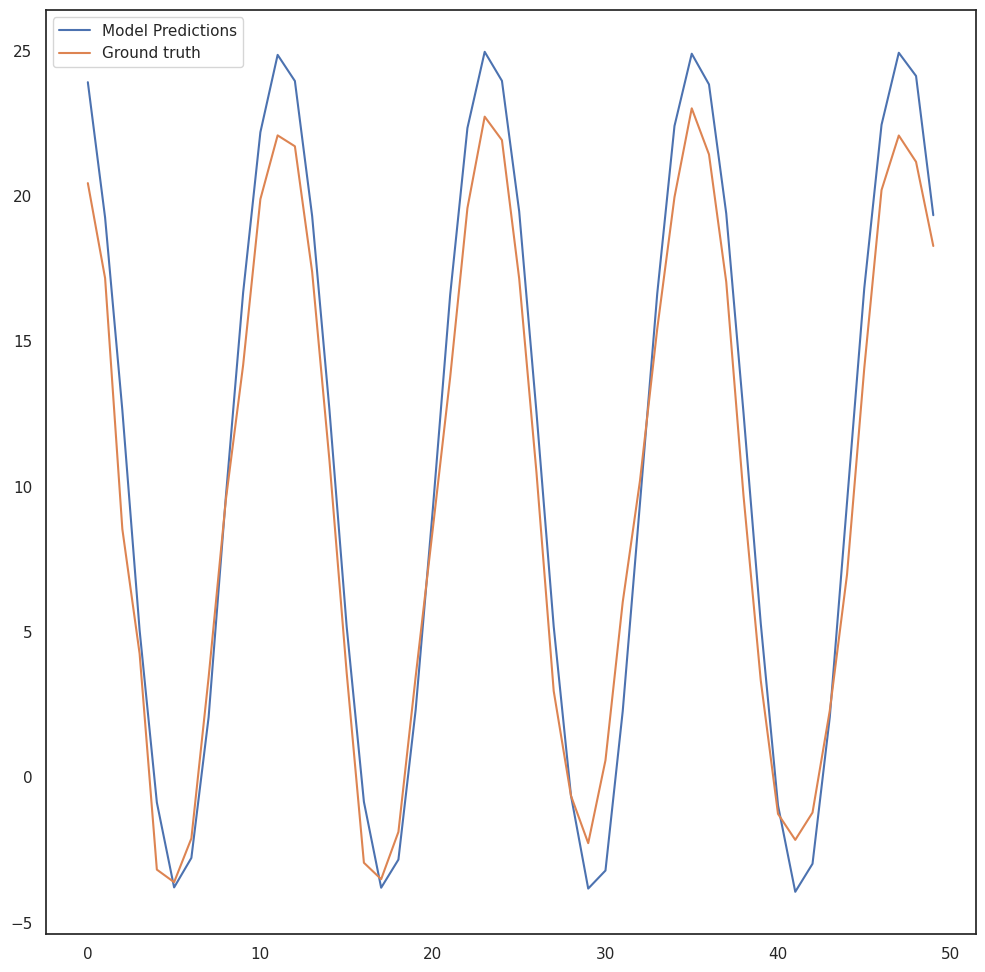

In [ ]:
# Initialize model, loss function, and optimizer
model = Model_GRU(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers, output_size=output_size).to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Train and evaluate the model
train_test_model(model, criterion, optimizer, num_epochs, trainingDataloader, testingDataloader)

filename1 = 'USA_GRU_GroundTruth.csv'
filename2 = 'USA_GRU_Predictions.csv'
filename3 = 'USA_GRU_OutputDates.csv'
with torch.no_grad():
  for batch_num, data in enumerate(testingDataloader):
    input_sequences, input_dates, input_countries, label_sequence, output_dates, output_countries = data
    for i in range(len(input_countries)):
      if (input_countries[i] == 'United States'):
        outputs = model(input_sequences[i, :, :].unsqueeze(0))
        outputs = outputs.squeeze(0).cpu()
        ground_truth = label_sequence[i].cpu()
        # Plot for debugging purposes only. For comparisons see subsequent Model Comparison section
        plt.plot(outputs, label = "Model Predictions")
        plt.plot(ground_truth, label = "Ground truth")
        plt.legend()
        plt.show()
        
        write_to_csv(filename1, ground_truth.numpy().tolist())
        write_to_csv(filename2, outputs.numpy().tolist())
        write_to_csv(filename3, reorder_batch_output_dates(output_dates)[0])
        break

##**Model Comparison**

In this section we compare the model performances with each other and a baseline. As the baseline we predict a given month's temperature as being the temperature from 12 months ago i.e. the temperature of the same month last year.

We begin by loading the deep learning model outputs into memory.

In [ ]:
!gdown 19-Yl4WQQMS1oMKkxjuweMaNJVPnwnd2E
!gdown 1-RYc8aSIpOQ-GlJzacF60YAL6h3Qf5CX
!gdown 1Z7V7OVQlpcCMXFU8_M-_58tw1Na9a6as
!gdown 19kzYLq-z0vnD0gQwsn7b4cyXL5-qPWpV
!gdown 1vLgreEVtR3915WhrG1VfZyrzFt5Hraup
!gdown 1JwArdxV5UwhXyKeQVxtHzSKzItS0G3th
!gdown 1sAq8nvjFkQzqniV6B6c5lpfQO_yw78V1
!gdown 1nEAfRPOUipSGEtRJiwWo-ATL7KhXHMCI
!gdown 1YJqg4D93C10JpXetHmt3l08X-NOKNb7d

Downloading...
From: https://drive.google.com/uc?id=19-Yl4WQQMS1oMKkxjuweMaNJVPnwnd2E
To: /content/PA_RNN_OutputDates.csv
100% 1.06k/1.06k [00:00<00:00, 2.45MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-RYc8aSIpOQ-GlJzacF60YAL6h3Qf5CX
To: /content/USA_RNN_GroundTruth.csv
100% 996/996 [00:00<00:00, 2.29MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Z7V7OVQlpcCMXFU8_M-_58tw1Na9a6as
To: /content/USA_RNN_Predictions.csv
100% 995/995 [00:00<00:00, 2.12MB/s]
Downloading...
From: https://drive.google.com/uc?id=19kzYLq-z0vnD0gQwsn7b4cyXL5-qPWpV
To: /content/USA_LSTM_Predictions.csv
100% 988/988 [00:00<00:00, 2.22MB/s]
Downloading...
From: https://drive.google.com/uc?id=1vLgreEVtR3915WhrG1VfZyrzFt5Hraup
To: /content/USA_GRU_Predictions.csv
100% 985/985 [00:00<00:00, 2.28MB/s]
Downloading...
From: https://drive.google.com/uc?id=1JwArdxV5UwhXyKeQVxtHzSKzItS0G3th
To: /content/PA_RNN_GroundTruth.csv
100% 962/962 [00:00<00:00, 2.22MB/s]
Downloading...
From: https://drive.go

We create a dataframe `df_comparison` that contains the ground truths and predictions for all models/baseline on the test data for US and PA.

In [ ]:
df_comparison = pd.DataFrame()
df_comparison["date"] = pd.read_csv("PA_RNN_OutputDates.csv")["data"]
df_comparison["date"] = pd.to_datetime(df_comparison["date"]).dt.date
df_comparison["US_GroundTruth"] = pd.read_csv("USA_RNN_GroundTruth.csv")["data"]
df_comparison["US_Baseline"] = df_temperatures_US["temp"].shift(12)[-50:].reset_index(drop=True)
df_comparison["US_SARIMA"] = test_US.reset_index(drop=True)["pred"]
df_comparison["US_RNN"] = pd.read_csv("USA_RNN_Predictions.csv")["data"]
df_comparison["US_LSTM"] = pd.read_csv("USA_LSTM_Predictions.csv")["data"]
df_comparison["US_GRU"] = pd.read_csv("USA_GRU_Predictions.csv")["data"]
df_comparison["PA_GroundTruth"] = pd.read_csv("PA_RNN_GroundTruth.csv")["data"]
df_comparison["PA_Baseline"] = df_temperatures_PA["temp"].shift(12)[-50:].reset_index(drop=True)
df_comparison["PA_SARIMA"] = test_PA.reset_index(drop=True)["pred"]
df_comparison["PA_RNN"] = pd.read_csv("PA_RNN_Predictions.csv")["data"]
df_comparison["PA_LSTM"] = pd.read_csv("PA_LSTM_Predictions.csv")["data"]
df_comparison["PA_GRU"] = pd.read_csv("PA_GRU_Predictions.csv")["data"]
df_comparison

date  US_GroundTruth  US_Baseline  US_SARIMA     US_RNN    US_LSTM  \
0   2009-08-01       20.436001       20.543  20.987049  13.863042  19.596504   
1   2009-09-01       17.167000       16.567  16.755659   9.756227  15.448740   
2   2009-10-01        8.534000        9.164  10.008514   5.114870   9.615893   
3   2009-11-01        4.251000        3.620   3.628410  -0.144076   2.955582   
4   2009-12-01       -3.178000       -2.532  -1.527819  -5.265710  -1.818397   
5   2010-01-01       -3.610000       -3.569  -2.688852  -7.725811  -3.352675   
6   2010-02-01       -2.105000       -0.310  -0.724767  -6.123348  -1.178214   
7   2010-03-01        3.436000        2.833   3.380779  -1.473884   3.622936   
8   2010-04-01        9.550000        8.172   8.670659   4.427968   9.220018   
9   2010-05-01       14.174000       14.884  14.562274  10.237375  14.554785   
10  2010-06-01       19.885000       18.962  19.328660  14.416838  18.545263   
11  2010-07-01       22.077999       21.463  22.006012  15.675298  20.657465   
12  2010-08-01       21.702999       20.436  21.075800  13.726254  19.609480   
13  2010-09-01       17.384001       17.167  16.756362   9.783686  15.152688   
14  2010-10-01       10.913000        8.534  10.009465   4.920224   9.451817   
15  2010-11-01        3.601000        4.251   3.629596  -0.149172   3.148059   
16  2010-12-01       -2.942000       -3.178  -1.526444  -5.274356  -1.635123   
17  2011-01-01       -3.507000       -3.610  -2.687434  -7.610117  -3.127712   
18  2011-02-01       -1.881000       -2.105  -0.723421  -6.049688  -0.996119   
19  2011-03-01        3.462000        3.436   3.381974  -1.427024   3.763980   
20  2011-04-01        8.582000        9.550   8.671658   4.274025   9.055090   
21  2011-05-01       13.759000       14.174  14.563057  10.309484  14.439157   
22  2011-06-01       19.577999       19.885  19.329268  14.368251  18.721375   
23  2011-07-01       22.722000       22.078  22.006521  15.700063  20.613640   
24  2011-08-01       21.915001       21.703  21.076343  13.938635  19.562773   
25  2011-09-01       17.148001       17.384  16.757064   9.730888  15.506566   
26  2011-10-01       10.490000       10.913  10.010415   5.155995   9.436120   
27  2011-11-01        2.966000        3.601   3.630781  -0.109200   3.199183   
28  2011-12-01       -0.635000       -2.942  -1.525069  -5.037973  -1.731306   
29  2012-01-01       -2.268000       -3.507  -2.686016  -7.477359  -3.054373   
30  2012-02-01        0.582000       -1.881  -0.722076  -6.368616  -1.354563   
31  2012-03-01        6.024000        3.462   3.383168  -1.340394   3.650557   
32  2012-04-01       10.196000        8.582   8.672658   4.384562   9.214340   
33  2012-05-01       15.422000       13.759  14.563839  10.123939  14.408774   
34  2012-06-01       19.954000       19.578  19.329875  14.271566  18.683132   
35  2012-07-01       23.007999       22.722  22.007030  15.758228  20.722198   
36  2012-08-01       21.422001       21.915  21.076886  13.992726  19.504622   
37  2012-09-01       17.035999       17.148  16.757766   9.842283  15.482030   
38  2012-10-01        9.688000       10.490  10.011366   5.105410   9.648292   
39  2012-11-01        3.330000        2.966   3.631967  -0.034015   3.167828   
40  2012-12-01       -1.261000       -0.635  -1.523694  -5.077932  -1.860904   
41  2013-01-01       -2.155000       -2.268  -2.684598  -7.869953  -3.108559   
42  2013-02-01       -1.216000        0.582  -0.720730  -6.150832  -1.082833   
43  2013-03-01        2.289000        6.024   3.384363  -1.377477   3.488080   
44  2013-04-01        6.970000       10.196   8.673658   4.441310   9.350483   
45  2013-05-01       14.073000       15.422  14.564622  10.276284  14.455493   
46  2013-06-01       20.198000       19.954  19.330482  14.131243  18.782427   
47  2013-07-01       22.073999       23.008  22.007538  15.653648  20.739748   
48  2013-08-01       21.167999       21.422  21.077429  13.929308  19.669117   
49  2013-0

We now compute the RMSE for all models/baseline.

In [ ]:
print(f"Data: US | Model: Baseline      | RMSE: {rmse(df_comparison['US_GroundTruth'], df_comparison['US_Baseline']):.3f}")
print(f"Data: US | Model: SARIMA        | RMSE: {rmse(df_comparison['US_GroundTruth'], df_comparison['US_SARIMA']):.3f}")
print(f"Data: US | Model: RNN           | RMSE: {rmse(df_comparison['US_GroundTruth'], df_comparison['US_RNN']):.3f}")
print(f"Data: US | Model: LSTM          | RMSE: {rmse(df_comparison['US_GroundTruth'], df_comparison['US_LSTM']):.3f}")
print(f"Data: US | Model: GRU           | RMSE: {rmse(df_comparison['US_GroundTruth'], df_comparison['US_GRU']):.3f}")
print(f"Data: PA | Model: Baseline      | RMSE: {rmse(df_comparison['PA_GroundTruth'], df_comparison['PA_Baseline']):.3f}")
print(f"Data: PA | Model: SARIMA        | RMSE: {rmse(df_comparison['PA_GroundTruth'], df_comparison['PA_SARIMA']):.3f}")
print(f"Data: PA | Model: RNN           | RMSE: {rmse(df_comparison['PA_GroundTruth'], df_comparison['PA_RNN']):.3f}")
print(f"Data: PA | Model: LSTM          | RMSE: {rmse(df_comparison['PA_GroundTruth'], df_comparison['PA_LSTM']):.3f}")
print(f"Data: PA | Model: GRU           | RMSE: {rmse(df_comparison['PA_GroundTruth'], df_comparison['PA_GRU']):.3f}")

Data: US | Model: Baseline      | RMSE: 1.244
Data: US | Model: SARIMA        | RMSE: 0.901
Data: US | Model: RNN           | RMSE: 5.560
Data: US | Model: LSTM          | RMSE: 1.346
Data: US | Model: GRU           | RMSE: 3.548
Data: PA | Model: Baseline      | RMSE: 2.432
Data: PA | Model: SARIMA        | RMSE: 3.062
Data: PA | Model: RNN           | RMSE: 3.686
Data: PA | Model: LSTM          | RMSE: 2.466
Data: PA | Model: GRU           | RMSE: 2.560


We make the following observations from the above results:
*   The baseline performs reasonably well, and in fact performs the best for the PA data. This is not surprising given that we have previously shown the seasonality and the gently rising trend of the temperature data. This month's temperature is indeed a reasonable estimate of the temperature 12 months from now.
*   SARIMA is the best performing model for the US data, outperforming the deep learning models. One potential reason for this is that the SARIMA model has been trained specifically on US data, whereas the deep learning models, owing to their data intensive nature, have been trained on the data from all countries. Temperatures from different countries need not be correlated with each other, especially if they are far apart. Hence, while the training data may enable the deep learning models to capture general trends in global temperatures, it seems to have limited their ability to capture minutiae specific to the US data.
*   The GRU outperforms the RNN for both the US and PA data. Likewise, the LSTM outperforms the GRU for both the US and PA data. This makes sense as LSTMs and GRUs have specifically been designed to be improvements to the RNN models.
*   The LSTM is the best performing model for PA and has an RMSE comparable to the baseline. This is inline with our earlier observations that US state temperatures are strongly positively correlated with each other, and hence training on all the state data may not particularly limit the model's ability to predict PA temperatures.

Finally, for the US test data we show a plot of the predictions of our best performing model (SARIMA) vs. the ground truth.

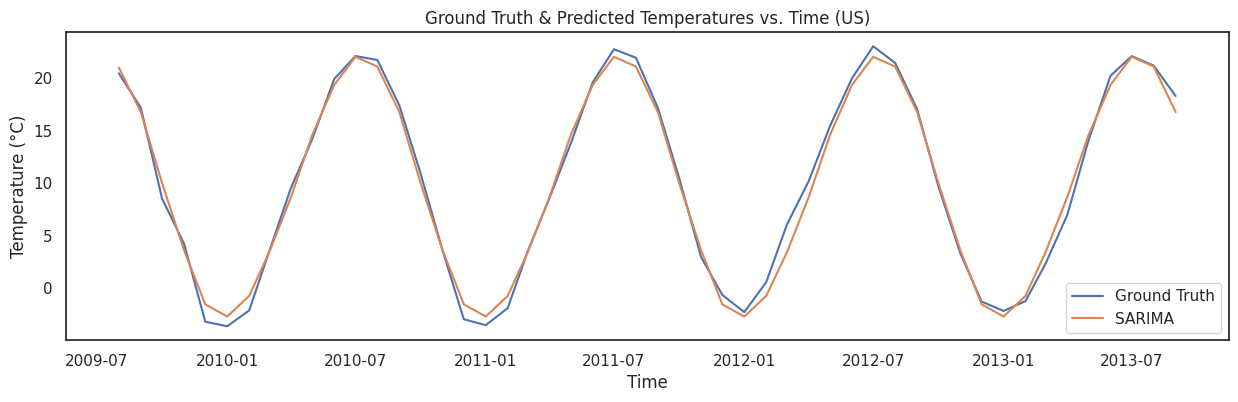

In [ ]:
plt.figure(figsize=(15, 4))
plt.plot(df_comparison["date"], df_comparison["US_GroundTruth"], label="Ground Truth")
plt.plot(df_comparison["date"], df_comparison["US_SARIMA"], label="SARIMA")
plt.xlabel("Time")
plt.ylabel("Temperature (°C)")
plt.title("Ground Truth & Predicted Temperatures vs. Time (US)")
plt.legend(loc="best")

Likewise, for the PA test data we show a plot of the predictions of our best performing model (LSTM) vs. the ground truth.

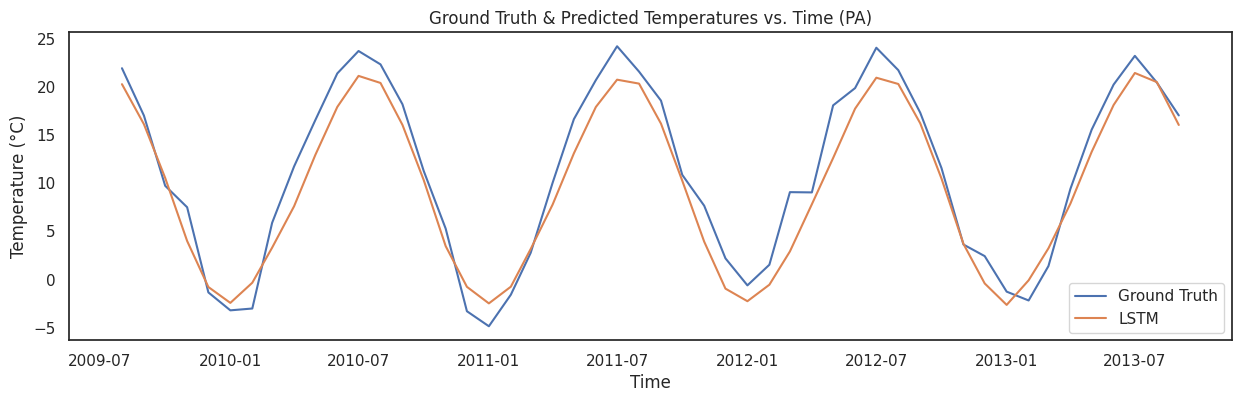

In [ ]:
plt.figure(figsize=(15, 4))
plt.plot(df_comparison["date"], df_comparison["PA_GroundTruth"], label="Ground Truth")
plt.plot(df_comparison["date"], df_comparison["PA_LSTM"], label="LSTM")
plt.xlabel("Time")
plt.ylabel("Temperature (°C)")
plt.title("Ground Truth & Predicted Temperatures vs. Time (PA)")
plt.legend(loc="best")

#**Challenges & Obstacles**

We faced several challenges while working on this project, some of which we summarize below:
*   **Temperature Data**: Our temperature data was monthly, and hence limited in size for a given country/US state (as a rough estimate, we had ~200 years worth of monthly data, which is ~2500 monthly data points for any given series). Our deep learning models are data intensive, and hence to avoid overfitting we trained each of these models with the data from all countries/states. This proved worthwhile for the US state data with the LSTM model performing close to the best. However, it didn't work out as well for the country data which isn't as correlated as the US state data.
*   **Indicator Data**: Our indicator data was yearly, starting from 1960. Hence we only had ~50 data points to work with for a given indicator (many of which were null values). This limited the types of analyses we could carry out on the indicator data. However, we have tried our best to do the same by joining it with the temperature data and exploring the relationships between temperature and some indicators using correlations and simple regressions. 
*   **Deep Learning Framework**: We faced some difficulties in working with PyTorch to train our deep learning models. For example, we can't use datetime objects in a PyTorch batch dataloader due to the type not being acceptable. The solution we found here was to cast datetime objects to strings inside of nested Python lists to be passed into the dataloader. Likewise, the PyTorch batch dataloader reorders datetime objects, which is something we didn't want. The solution we found here was to write a helper function to undo the reordering from using a dataloader.
*   **Miscellaneous**: Coordinating between team members on a large project with many moving parts is always a challenge. To overcome this, we organized weekly meetings throughout the duration of the project to share updates and created a shared common drive with all our work so that we could see and adapt each other's code to what we were working on. We also assigned tasks based on what each of us was most comfortable working on to ensure a seamless progression.

#**Future Directions & Next Steps**

While we feel satisfied with our work on this project, the field of time series forecasting is broad and there is plenty that is left to be done:
*   **Data**: As mentioned in the **Challenges & Obstacles** section, a key difficulty we have faced is data shortage for both the temperature and indicator data. To better train our current models and experiment with additional analyses we could look for larger temperature/indicator datasets, with a daily/weekly frequency instead of monthly/yearly.
*   **Models**: Assuming we can overcome data shortage issues, it would be interesting to experiment with other models such as transformers. We could also work with open-source time series modelling packages such as Facebook's [Prophet](https://facebook.github.io/prophet/).
*   **Hyperparameters**: For our existing models there is more that can be done with regards to hyperparameter tuning. In the case of SARIMA, we have relied on the `pmdarima.arima.auto_arima` function to find the optimal parameters. As a learning experience, we could complement this with a manual attempt to select the optimal parameters by looking into the data statistics in more depth and using rules of thumb in the time series community. Likewise, for the deep learning models we could experiment with different hidden state sizes, loss functions, optimizers etc.
*   **Different Regions**: Our models have been tested on US country-level and Pennsylvania state-level temperature data. It would be interesting to train/test our models on data from other regions around the world and compare the results to that of the US.
*   **Forecasting Duration**: Our models have been used to forecast temperatures for 50 months (~4 years) of test data. We could look into forecasting over longer time periods eg. 10, 50 or a 100 years, and see how the models perform over different forecasting periods.

#**Conclusion & Acknowledgments**

In this project our aim was to investigate patterns of temperature change across the world, to better understand the factors that affect temperature, and to build temperature forecasting models. Our EDA, plots, and SQL queries have allowed us to investigate and visualize temperature change. Joining our temperature data with the indicator data and performing correlations/regressions on the same has given us a better sense of the factors that affect temperature. Finally, our trained forecasting models generally perform well on the test data, with the SARIMA model performing the best for the US country-level data, and the LSTM model performing close to the best for the PA state-level data.

Working on this project, while challenging, is something we have truly enjoyed. This course has given us a breadth of knowledge, and working on this project has given us the opportunity to gain hands on experience with it. The prospect of working on the topic we have chosen was quite daunting at first as none of us have an extensive background in time series analysis. For the same reasons the project has turned out to be a good learning experience. We have all put in our best effort to obtain meaningful visualizations, models, and insights from the data. And of course, the course materials have been a valuable guide. Overall, we are quite satisfied with our work.

We would like to express our gratitude to our project mentor Federico Cimini for his valuable inputs and prompt responses when we have reached out to him! Also, a special thank you to Professor Ives and all course TAs for providing us with a meaningful and enjoyable experience while taking this course!


hands-holding-words-thank-you_53876-30955.avif